# Install VS Code
Download Visual Studio Code from the official website: https://code.visualstudio.com/
# Sample data
https://www.midori-global.com/products/better-excel-exporter-for-jira/server/export-samples/jira-issues-excel-reports

# Add Cody AI extension
Launch VS Code:

Open VS Code from your applications menu or desktop shortcut
Add the Cody AI extension:

In VS Code, click on the Extensions icon in the left sidebar (it looks like four squares)
In the search bar, type "Cody AI"
Look for the Cody AI extension by Sourcegraph
Click the "Install" button next to the Cody AI extension
Configure Cody AI:

After installation, you may need to sign in or configure the extension
Follow any prompts or instructions provided by the extension
Now you have VS Code installed with the Cody AI extension ready to use. You can start coding and leveraging the power of AI assistance in your development workflow.

 # Installing packages 

## Using the integrated terminal:

* Open the integrated terminal in VS Code (View > Terminal)
* Use pip to install packages:
* pip install package_name

### Packages:
* pm4py
* numpy  (usage: import numpy as np)
* seaborn (usage: import seaborn as sns)
* networkx (usage: import networkx as nx)
* pandas (usage: import pandas as pd)
* matplotlib (usage: import matplotlib.pyplot as plt)


## Using a requirements.txt file:

* Create a requirements.txt file in your project
* List all required packages in the file
* Run the following command in the terminal:
* pip install -r requirements.txt

In [65]:
import pipreqs

## Creating a requirements.txt file
* To create a requirements.txt file, you can use the pip freeze command in your terminal or command prompt. Here's how you can do it:
* Open your terminal or command prompt.
* Navigate to the directory where your Python project is located.
* Run the following command:
    * pip freeze > requirements.txt
    
    * This command will create a requirements.txt file in the current directory with all the installed packages and their versions.
    * If you want to include only specific packages in the requirements.txt file, you can use the pip freeze command with the --exclude-editable flag. For example:

## Download and install Graphviz:

* Go to the official Graphviz download page: https://graphviz.org/download/
    * For Windows, download the installer from the Windows section
* Run the installer and complete the installation

After installation, you need to add Graphviz to your system PATH:

`setx PATH "%PATH%;C:\Program Files\Graphviz\bin"`


Note: The path might be different depending on where you installed Graphviz. Common locations are:

    * `C:\Program Files\Graphviz\bin`
    * `C:\Program Files (x86)\Graphviz\bin`

* Restart your Jupyter notebook or Python environment to apply the PATH changes.

If you're using Anaconda, you can also install Graphviz through conda:

`conda install -c conda-forge graphviz`


You also need to install the Python graphviz package:
`pip install graphviz`

### If you can't install software, you can use alternative visualization methods:

Save the visualization to a file instead of displaying it

`from pm4py.visualization.dfg import visualizer as dfg_visualizer`

`gviz = dfg_visualizer.apply(dfg, start_activities=start_activities, end_activities=end_activities)`

`dfg_visualizer.save(gviz, "process_model.png")`



## Overview of Process Mining Algorithms
### Read the Docs
* https://processintelligence.solutions/static/api/2.7.11/index.html
### Run through of implementation including algorithmic details
* https://medium.com/wonderful-world-of-data-science/process-mining-with-python-tutorial-a-healthcare-application-part-2-4cf57053421f
* https://hussamalhumsi-21111.medium.com/process-mining-with-python-6ca1d733b3e6
### Similar but included Conformance Checking
* https://analyticsindiamag.com/ai-mysteries/guide-to-pm4py-python-framework-for-process-mining-algorithms/
### Deeper dive into the algorithms
* https://www.processmaker.com/blog/process-mining-algorithms-simply-explained/
### Navigating Process Mining: A Case study using pm4py 
* https://arxiv.org/pdf/2409.11294


# Imports

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(pd.__version__)

2.2.3


In [2]:
# System utilities
import os

# Visualization
import seaborn as sns
import networkx as nx

# PM4PY Core Functions
from pm4py.objects.conversion.log import converter as log_converter
from pm4py import get_start_activities, get_end_activities

# Process Discovery
from pm4py import discover_directly_follows_graph, view_dfg
from pm4py import discover_petri_net_inductive
from pm4py import discover_process_tree_inductive
from pm4py import discover_petri_net_heuristics, view_petri_net
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.temporal_profile import algorithm as temporal_profile_discovery

# Filtering and Statistics
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics

# Visualization Components
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer
from pm4py import view_process_tree

# Organizational Mining
import pm4py.algo.organizational_mining.sna as sna_fact


In [3]:
from datetime import datetime, timedelta
import uuid

# Set seed for reproducibility
np.random.seed(42)

# Define parameters
n_records = 100
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 3, 31)
date_range = (end_date - start_date).days

# Define possible values for categorical columns
authors = ["John Smith", "Jane Doe", "Alex Johnson", "Maria Garcia", "David Kim"]
keys = ["PROJ-123", "PROJ-124", "PROJ-125", "PROJ-126", "PROJ-127"]
fields = ["status", "assignee", "priority", "labels", "comment"]
status_values = ["To Do", "In Progress", "Code Review", "Testing", "Done"]
priority_values = ["Low", "Medium", "High", "Critical"]
assignee_values = authors + [None]  # Include None for unassigned

# Generate sample data
data = []

for i in range(n_records):
    # Generate random dates within range
    random_days = np.random.randint(0, date_range)
    start_datetime = start_date + timedelta(days=random_days, 
                                           hours=np.random.randint(0, 24),
                                           minutes=np.random.randint(0, 60))
    
    # Event duration between 5 minutes and 3 hours
    event_duration_minutes = np.random.randint(5, 180)
    end_datetime = start_datetime + timedelta(minutes=event_duration_minutes)
    
    # Select random values for categorical fields
    author = np.random.choice(authors)
    key = np.random.choice(keys)
    field = np.random.choice(fields)
    
    # Generate appropriate from/to values based on field
    if field == "status":
        fromString = np.random.choice(status_values)
        # Ensure toString is different from fromString
        toString = np.random.choice([s for s in status_values if s != fromString])
    elif field == "priority":
        fromString = np.random.choice(priority_values)
        toString = np.random.choice([p for p in priority_values if p != fromString])
    elif field == "assignee":
        fromString = np.random.choice(assignee_values)
        toString = np.random.choice([a for a in assignee_values if a != fromString])
    elif field == "labels":
        fromString = np.random.choice(["", "bug", "feature", "documentation"])
        toString = np.random.choice(["bug", "feature", "documentation", "bug critical"])
    else:  # comment
        fromString = None
        toString = f"Comment added at {start_datetime.strftime('%Y-%m-%d %H:%M')}"
    
    # Generate task_id and activity
    task_id = f"TASK-{np.random.randint(1000, 9999)}"
    
    # Activity is typically a combination of field and action
    if field == "status":
        activity = f"Move to {toString}"
    elif field == "assignee":
        activity = "Assign Issue" if toString else "Unassign Issue"
    elif field == "priority":
        activity = f"Change Priority to {toString}"
    elif field == "labels":
        activity = "Update Labels"
    else:
        activity = "Add Comment"
    
    # Generate unique IDs
    id = i + 1000
    upsert_id = str(uuid.uuid4())
    
    # Start time updated (usually same as start_datetime or slightly after)
    start_time_updated = start_datetime + timedelta(minutes=np.random.randint(0, 5))
    
    # Create record
    record = {
        "id": id,
        "start_datetime": start_datetime,
        "author.name": author,
        "key": key,
        "field": field,
        "fromString": fromString,
        "toString": toString,
        "task_id": task_id,
        "activity": activity,
        "end_datetime": end_datetime,
        "event_duration_minutes": event_duration_minutes,
        "start_time_updated": start_time_updated,
        "upsert_id": upsert_id
    }
    
    data.append(record)

# Create DataFrame
sample_data = pd.DataFrame(data)

# Sort by start_datetime
sample_data = sample_data.sort_values(by=["key", "start_datetime"])

# Save to CSV
sample_data.to_csv("jira_process_mining_sample.csv", index=False)

# Display first few rows
print(sample_data.head())

print(f"Sample dataset created with {n_records} records and saved to jira_process_mining_sample.csv")


      id      start_datetime   author.name       key     field    fromString  \
70  1070 2023-01-01 18:44:00    John Smith  PROJ-123  assignee  Maria Garcia   
40  1040 2023-01-12 20:00:00      Jane Doe  PROJ-123  assignee          None   
76  1076 2023-01-16 07:03:00  Maria Garcia  PROJ-123  priority      Critical   
53  1053 2023-01-16 20:04:00  Maria Garcia  PROJ-123    labels       feature   
17  1017 2023-01-27 19:12:00  Alex Johnson  PROJ-123   comment          None   

                             toString    task_id                 activity  \
70                           Jane Doe  TASK-1249             Assign Issue   
40                         John Smith  TASK-8404             Assign Issue   
76                               High  TASK-1666  Change Priority to High   
53                                bug  TASK-8651            Update Labels   
17  Comment added at 2023-01-27 19:12  TASK-1663              Add Comment   

          end_datetime  event_duration_minutes  start_ti

In [5]:
# Load your existing dataset
# Replace 'jira_process_mining_sample.csv' with your actual file path
sample_data = pd.read_csv('jira_process_mining_sample.csv')

# Convert datetime columns to datetime type
sample_data['start_datetime'] = pd.to_datetime(sample_data['start_datetime'])
sample_data['end_datetime'] = pd.to_datetime(sample_data['end_datetime'])
sample_data['start_time_updated'] = pd.to_datetime(sample_data['start_time_updated'])

# Get unique ticket keys
unique_keys = sample_data['key'].unique()

# Create a list to store the new "Create Ticket" activities
create_ticket_records = []

# For each ticket, create a "Create Ticket" activity
for key in unique_keys:
    # Get all activities for this ticket
    ticket_activities = sample_data[sample_data['key'] == key]
    
    # Find the earliest timestamp for this ticket
    earliest_time = ticket_activities['start_datetime'].min()
    
    # Create a timestamp 1 minute before the earliest activity
    create_time = earliest_time - timedelta(minutes=1)
    
    # Create a new record for "Create Ticket" activity
    create_record = {
        "id": f"create_{key}",  # Create a unique ID
        "start_datetime": create_time,
        "author.name": ticket_activities['author.name'].iloc[0],  # Use the first author
        "key": key,
        "field": "status",
        "fromString": None,
        "toString": "Created",
        "task_id": f"TASK-CREATE-{key}",
        "activity": "Create Ticket",
        "end_datetime": create_time + timedelta(seconds=30),  # 30 seconds duration
        "event_duration_minutes": 0.5,  # 30 seconds in minutes
        "start_time_updated": create_time,
        "upsert_id": f"create_upsert_{key}"
    }
    
    create_ticket_records.append(create_record)

# Create a DataFrame from the new records
create_df = pd.DataFrame(create_ticket_records)

# Combine the original DataFrame with the new "Create Ticket" activities
df = pd.concat([sample_data, create_df], ignore_index=True)

# Sort by key and start_datetime to ensure proper order
df = df.sort_values(by=['key', 'start_datetime'])

# Reset index
df = df.reset_index(drop=True)

# Save the updated dataset
df.to_csv('jira_process_mining_with_create.csv', index=False)

print(f"Added 'Create Ticket' activities for {len(unique_keys)} tickets.")
print(f"New dataset saved as 'jira_process_mining_with_create.csv'")


Added 'Create Ticket' activities for 5 tickets.
New dataset saved as 'jira_process_mining_with_create.csv'


### Read in sample data

In [6]:
# os.chdir(r'C:\Users\PATH_TO_PROJECT')
# df = pd.read_excel('event_log_table_anon.xlsx')

# to export to excel
# df.to_excel('event_log_table_anon.xlsx', index=False)

#### Look at first X rows of data
- Defaults to five
- Syntax to customize df.head(3)

In [8]:
df[df['toString'] == 'Created']

id      start_datetime   author.name       key   field  \
0   create_PROJ-123 2023-01-01 18:43:00    John Smith  PROJ-123  status   
21  create_PROJ-124 2023-01-01 18:00:00  Maria Garcia  PROJ-124  status   
42  create_PROJ-125 2023-01-01 15:37:00     David Kim  PROJ-125  status   
68  create_PROJ-126 2023-01-05 06:02:00     David Kim  PROJ-126  status   
94  create_PROJ-127 2023-01-10 18:56:00    John Smith  PROJ-127  status   

   fromString toString               task_id       activity  \
0        None  Created  TASK-CREATE-PROJ-123  Create Ticket   
21       None  Created  TASK-CREATE-PROJ-124  Create Ticket   
42       None  Created  TASK-CREATE-PROJ-125  Create Ticket   
68       None  Created  TASK-CREATE-PROJ-126  Create Ticket   
94       None  Created  TASK-CREATE-PROJ-127  Create Ticket   

          end_datetime  event_duration_minutes  start_time_updated  \
0  2023-01-01 18:43:30                     0.5 2023-01-01 18:43:00   
21 2023-01-01 18:00:30                     0.5 2023-01-01 18:00:00   
42 2023-01-01 15:37:30                     0.5 2023-01-01 15:37:00   
68 2023-01-05 06:02:30                     0.5 2023-01-05 06:02:00   
94 2023-01-10 18:56:30                     0.5 2023-01-10 18:56:00   

                 upsert_id  
0   create_upsert_PROJ-123  
21  create_upsert_PROJ-124  
42  create_upsert_PROJ-125  
68  create_upsert_PROJ-126  
94  create_upsert_PROJ-127

In [7]:
df.head()

id      start_datetime   author.name       key     field  \
0  create_PROJ-123 2023-01-01 18:43:00    John Smith  PROJ-123    status   
1             1070 2023-01-01 18:44:00    John Smith  PROJ-123  assignee   
2             1040 2023-01-12 20:00:00      Jane Doe  PROJ-123  assignee   
3             1076 2023-01-16 07:03:00  Maria Garcia  PROJ-123  priority   
4             1053 2023-01-16 20:04:00  Maria Garcia  PROJ-123    labels   

     fromString    toString               task_id                 activity  \
0          None     Created  TASK-CREATE-PROJ-123            Create Ticket   
1  Maria Garcia    Jane Doe             TASK-1249             Assign Issue   
2           NaN  John Smith             TASK-8404             Assign Issue   
3      Critical        High             TASK-1666  Change Priority to High   
4       feature         bug             TASK-8651            Update Labels   

         end_datetime  event_duration_minutes  start_time_updated  \
0 2023-01-01 18:43:30                     0.5 2023-01-01 18:43:00   
1 2023-01-01 18:52:00                     8.0 2023-01-01 18:45:00   
2 2023-01-12 21:02:00                    62.0 2023-01-12 20:04:00   
3 2023-01-16 08:51:00                   108.0 2023-01-16 07:07:00   
4 2023-01-16 21:47:00                   103.0 2023-01-16 20:08:00   

                              upsert_id  
0                create_upsert_PROJ-123  
1  bbabd87a-5e97-40fa-b2d4-6c3e592ad7b8  
2  323d89f8-95c1-4707-8ba8-c82b4ef41177  
3  02c95c6c-c6ed-4568-bee0-77b0185fa40c  
4  9472bea9-9050-4168-bfdc-14c1425ef5cc

#### List dataframe datatypes

In [14]:
df.dtypes

id                                object
start_datetime            datetime64[ns]
author.name                       object
key                               object
field                             object
fromString                        object
toString                          object
task_id                           object
activity                          object
end_datetime              datetime64[ns]
event_duration_minutes           float64
start_time_updated        datetime64[ns]
upsert_id                         object
dtype: object

#### Print out common dataframe measures

In [9]:
num_events = len(df)
num_cases = len(df['key'].unique())
avg_events_per_case = num_events / num_cases
print(f"Number of events: {num_events}")
print(f"Number of cases: {num_cases}")
print(f"Average events per case: {avg_events_per_case}")

Number of events: 105
Number of cases: 5
Average events per case: 21.0


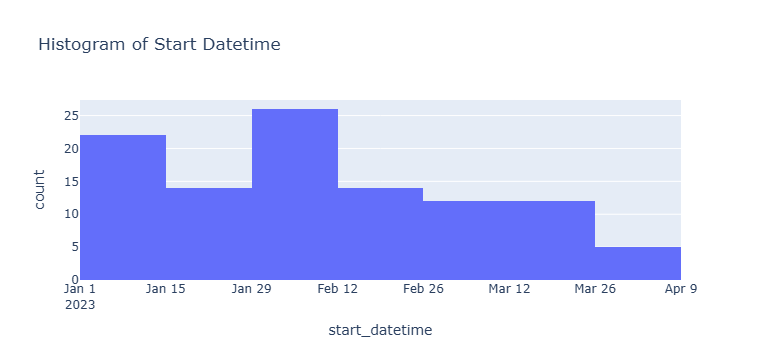

In [10]:
import plotly.express as px

# chart_df = df[df['start_datetime'] > '2023-08-01']
# chart_df = df.copy()
fig = px.histogram(df, x='start_datetime', title='Histogram of Start Datetime')
fig.show()


### Required columns and their mapping
- "case:concept:name" == key  -- this is the case id
- "concept:name" == activity 
- "time:timestamp" == start_time_updated  
#
- "duration" == event_duration_minutes  -- manually created column
- "org:resource" = author.name

### Format dataframe

In [11]:
df.rename(columns={'key': 'case:concept:name', 
                   'start_time_updated': 'time:timestamp', 
                   'activity': 'concept:name',
                   'author.name':  'org:resource'}, inplace=True)

In [12]:
# confirm changes
df.columns

Index(['id', 'start_datetime', 'org:resource', 'case:concept:name', 'field',
       'fromString', 'toString', 'task_id', 'concept:name', 'end_datetime',
       'event_duration_minutes', 'time:timestamp', 'upsert_id'],
      dtype='object')

## Creating the Event Log

In [13]:
# Convert the DataFrame to an event log
event_log = log_converter.apply(df)

### Exploring the Event Log 

In [14]:
# create start and end activities objects
start_activities = get_start_activities(event_log)
end_activities = get_end_activities(event_log)
print('start: ', start_activities)
print('end:   ', end_activities)

start:  {'Create Ticket': 5}
end:    {'Update Labels': 1, 'Move to Code Review': 1, 'Move to Testing': 1, 'Add Comment': 1, 'Move to To Do': 1}


### Directly follows graph

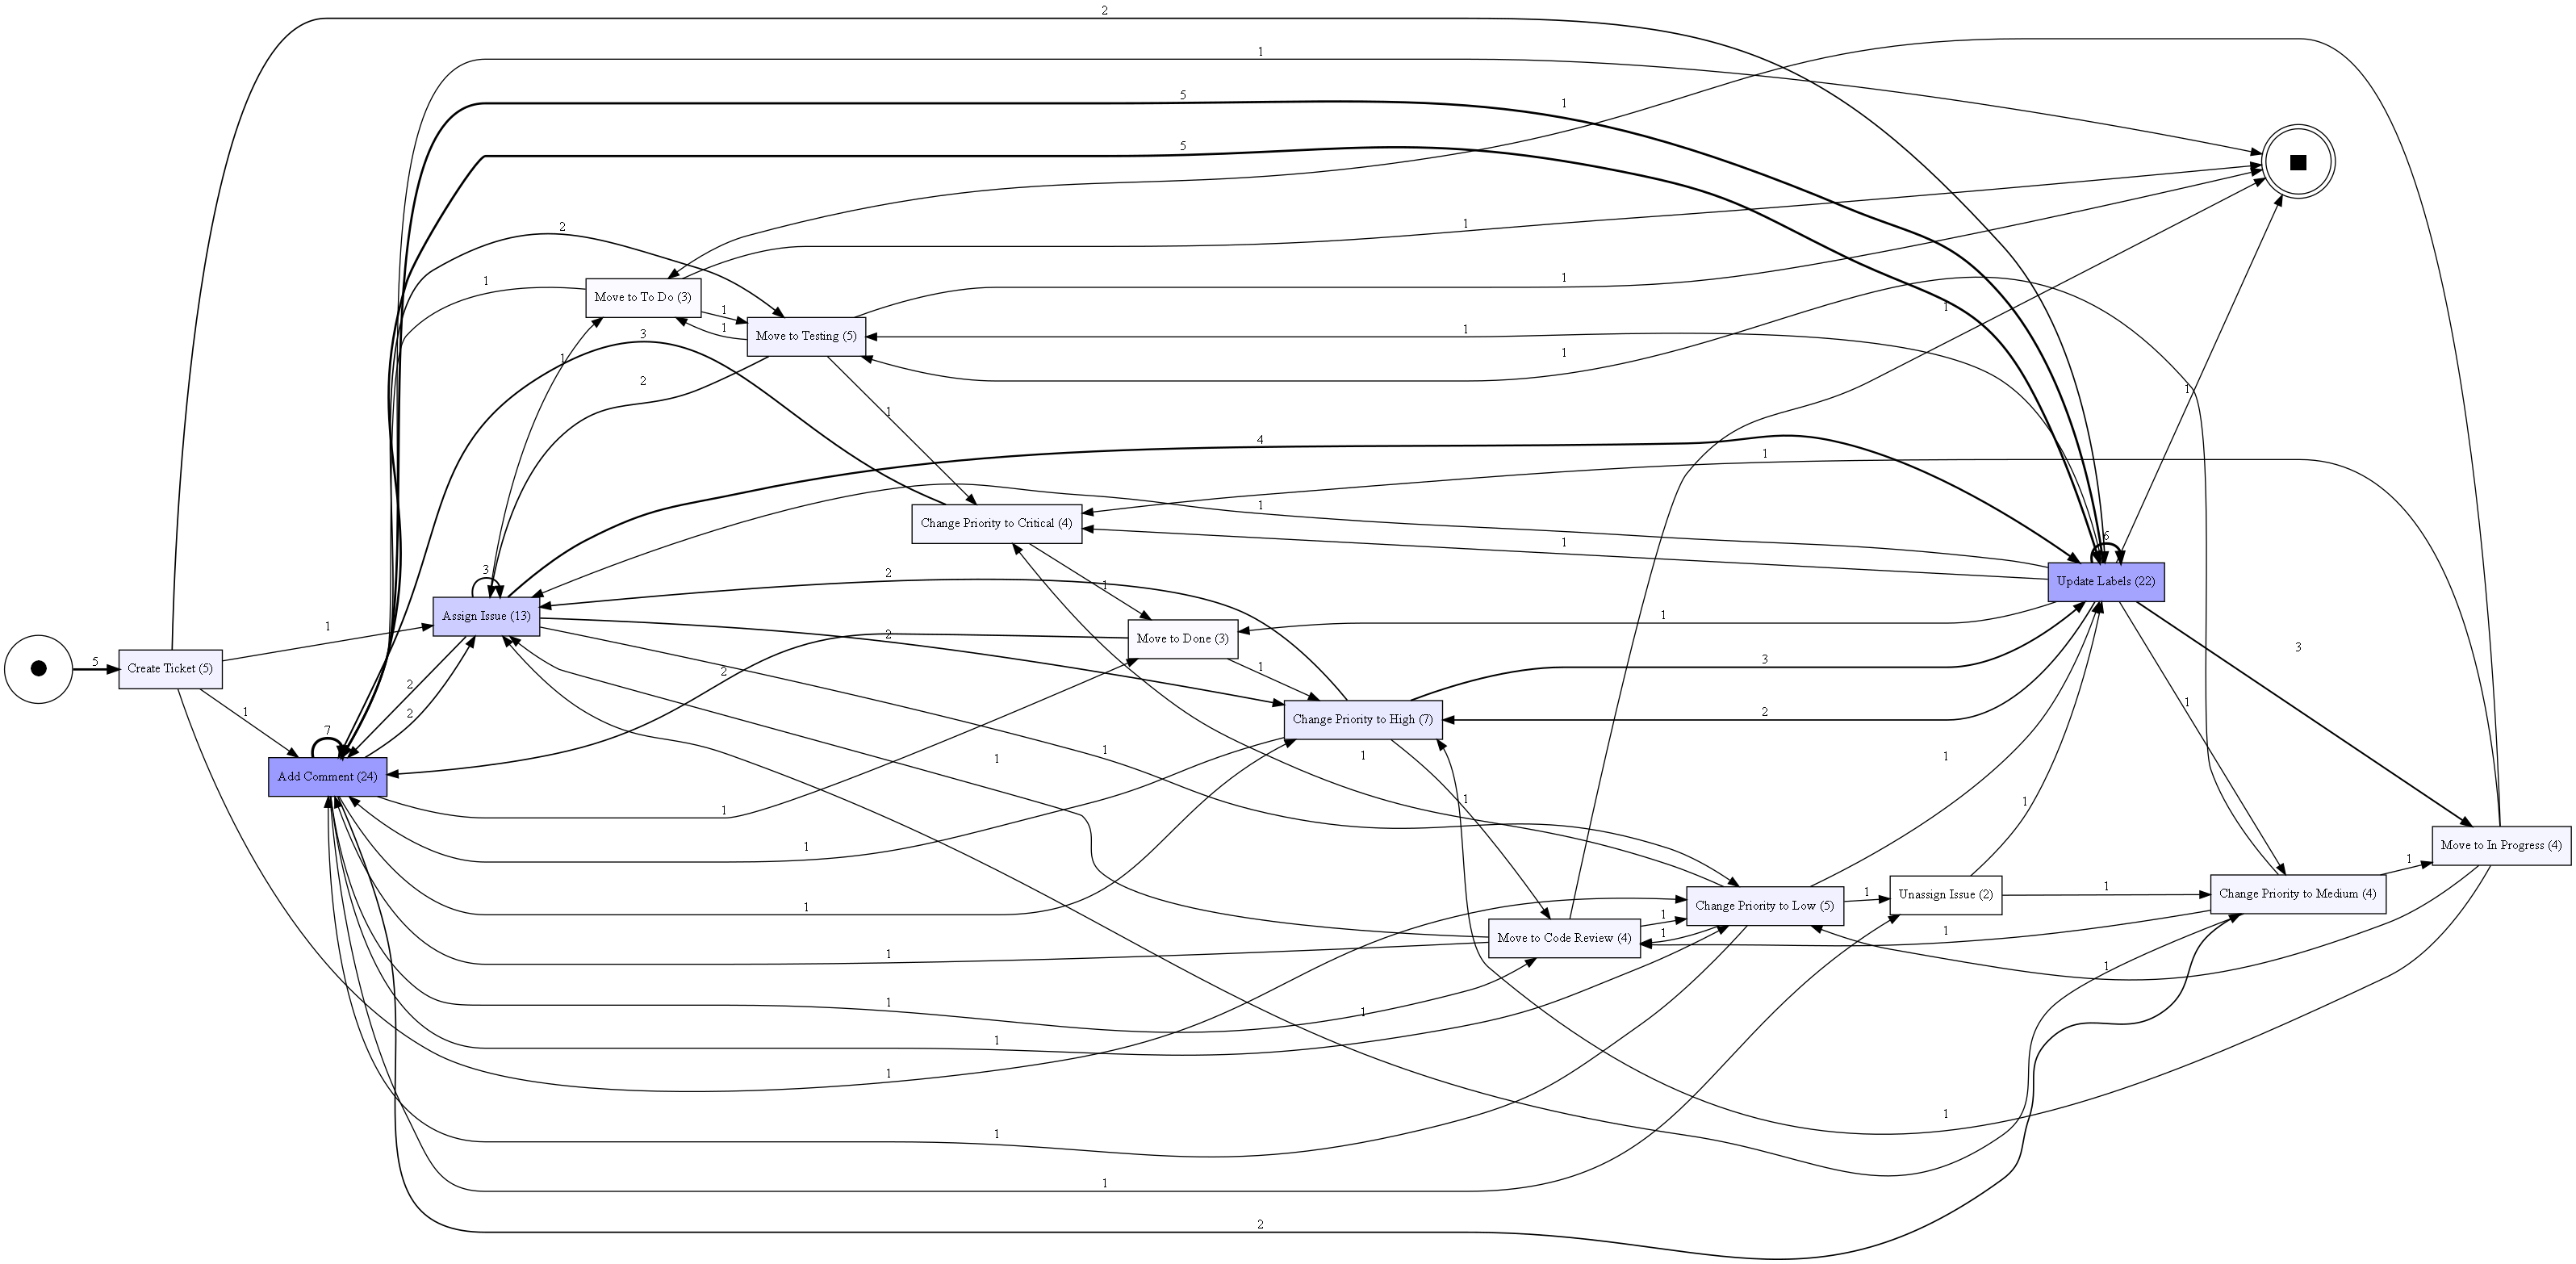

''

In [15]:
# from pm4py import discover_directly_follows_graph, view_dfg
# from pm4py.visualization.dfg import visualizer as dfg_visualizer

# First get the DFG and activities
dfg, start_activities, end_activities =discover_directly_follows_graph(event_log)

# Now visualize with the correct structure
view_dfg(dfg, start_activities=start_activities, end_activities=end_activities)

# Create the visualization with the correct parameters
parameters = {
    "format": "png",
    "start_activities": start_activities,
    "end_activities": end_activities
}

gviz_dfg = dfg_visualizer.apply(dfg, parameters=parameters)


# Save as PNG
dfg_visualizer.save(gviz_dfg, "process_model.png")

## Variants

In [16]:
variants = variants_filter.get_variants(event_log)
print(f"We have {len(variants)} variants in our event log")

We have 5 variants in our event log


In [17]:
# Get most common variants
most_common = case_statistics.get_variant_statistics(event_log)
top_variants = most_common[:5]  # View top 5 patterns

# Analyze variant frequencies
for variant in top_variants:
    print(f"Frequency: {variant['count']}")
    print(f"Path: {variant['variant']}")


Frequency: 1
Path: ('Create Ticket', 'Update Labels', 'Change Priority to Critical', 'Add Comment', 'Update Labels', 'Update Labels', 'Change Priority to High', 'Assign Issue', 'Assign Issue', 'Update Labels', 'Update Labels', 'Add Comment', 'Add Comment', 'Move to Code Review', 'Assign Issue', 'Update Labels', 'Move to Testing', 'Assign Issue', 'Add Comment', 'Change Priority to High', 'Move to Code Review')
Frequency: 1
Path: ('Create Ticket', 'Update Labels', 'Add Comment', 'Add Comment', 'Change Priority to Low', 'Change Priority to Critical', 'Add Comment', 'Update Labels', 'Update Labels', 'Move to Done', 'Add Comment', 'Move to Testing', 'Change Priority to Critical', 'Move to Done', 'Change Priority to High', 'Update Labels', 'Add Comment', 'Add Comment', 'Change Priority to Medium', 'Assign Issue', 'Change Priority to High', 'Add Comment', 'Add Comment', 'Add Comment', 'Change Priority to Medium', 'Move to Testing')
Frequency: 1
Path: ('Create Ticket', 'Change Priority to Low'

In [18]:
# Get variants and their statistics
variants = variants_filter.get_variants(event_log)

# View top variants with frequencies
for variant, cases in list(variants.items())[:5]:
    print(f"\nNumber of cases following this path: {len(cases)}")
    print(f"Activities in sequence: {variant}")



Number of cases following this path: 1
Activities in sequence: ('Create Ticket', 'Assign Issue', 'Assign Issue', 'Change Priority to High', 'Update Labels', 'Add Comment', 'Move to Done', 'Add Comment', 'Add Comment', 'Add Comment', 'Assign Issue', 'Update Labels', 'Update Labels', 'Update Labels', 'Change Priority to High', 'Update Labels', 'Add Comment', 'Move to Testing', 'Assign Issue', 'Update Labels', 'Update Labels')

Number of cases following this path: 1
Activities in sequence: ('Create Ticket', 'Update Labels', 'Change Priority to Critical', 'Add Comment', 'Update Labels', 'Update Labels', 'Change Priority to High', 'Assign Issue', 'Assign Issue', 'Update Labels', 'Update Labels', 'Add Comment', 'Add Comment', 'Move to Code Review', 'Assign Issue', 'Update Labels', 'Move to Testing', 'Assign Issue', 'Add Comment', 'Change Priority to High', 'Move to Code Review')

Number of cases following this path: 1
Activities in sequence: ('Create Ticket', 'Update Labels', 'Add Comment',

In [19]:
df.columns

Index(['id', 'start_datetime', 'org:resource', 'case:concept:name', 'field',
       'fromString', 'toString', 'task_id', 'concept:name', 'end_datetime',
       'event_duration_minutes', 'time:timestamp', 'upsert_id'],
      dtype='object')

### Create backup because this is a tutorial 
- in the real world you would create a dataframe with a new name to represent the change

In [20]:
original_df = df.copy()

In [21]:
df = original_df.copy()
# Convert the DataFrame to an event log
event_log = log_converter.apply(df)

##### Filter dataframe based on opening and closing activities

There are a large number of variants - further filter the dataframe to include only tickets that incldue both opening and closing activities

In [22]:
# # Get cases that start and end correctly
# case_starts = df[df['concept:name'] == 'Ticket Created']["case:concept:name"].unique()
# case_ends = df[df['concept:name'] == 'Ticket Closed']["case:concept:name"].unique()
# print("case_starts: ", case_starts)
# print("case_ends: ", case_ends)

# # Find cases that have both correct start and end
# complete_cases = set(case_starts).intersection(case_ends)
# print("complete_cases: ", complete_cases)

# # Filter dataframe to keep only these complete cases
# df = df[df['case:concept:name'].isin(complete_cases)]

# # Recreate the event log
# event_log = log_converter.apply(df)


In [23]:
# print(f"original_df: {len(original_df)}")
# print(f"new df: {len(df)}")
# event_log 

### Note: if the dataset is too large, you can use a subset of the data

In [24]:
# sub_df = df[['key', 'activity', 'start_time_updated', 'end_datetime']]
# # event_log.rename(columns={'ticket_id':'case:clientID'}, inplace=True)
# sub_df = pm4py.format_dataframe(dd, case_id='key', activity_key='activity', timestamp_key='start_time_updated')

# event_log = pm4py.convert_to_event_log(sub_df)

# Alpha Miner
the first algorithm that bridges the gap between event logs or observed data and the discovery of a process model. Alpha Miner can build process models in the form of Petri Net without using additional knowledge.

Some of the characteristics of the algorithm:
- Creates a Petri net model in which all the transitions are visible, unique, and correspond to the classified events.
- It cannot handle loops of length one or two.
- Invisible and duplicated tasks cannot be discovered.
- It does not handle noise well.

In [25]:
net, initial_marking, final_marking = alpha_miner.apply(event_log)

In [26]:
net

places: [ ({'Change Priority to Critical'}, {'Move to Done'}), ({'Change Priority to High', 'Change Priority to Medium'}, {'Move to Code Review'}), ({'Change Priority to Low'}, {'Unassign Issue', 'Change Priority to Critical'}), ({'Change Priority to Medium'}, {'Move to Code Review', 'Move to Testing', 'Move to In Progress'}), ({'Create Ticket', 'Move to In Progress'}, {'Change Priority to Low'}), ({'Move to Done', 'Move to In Progress'}, {'Change Priority to High'}), ({'Move to In Progress'}, {'Change Priority to High', 'Move to To Do', 'Change Priority to Critical'}), ({'Move to In Progress'}, {'Change Priority to High', 'Move to To Do', 'Change Priority to Low'}), ({'Move to Testing', 'Change Priority to Low'}, {'Change Priority to Critical'}), ({'Move to Testing', 'Move to In Progress'}, {'Change Priority to Critical'}), ({'Unassign Issue'}, {'Change Priority to Medium'}), end, start ]
transitions: [ (Add Comment, 'Add Comment'), (Assign Issue, 'Assign Issue'), (Change Priority to 

In [27]:
final_marking

['end:1']

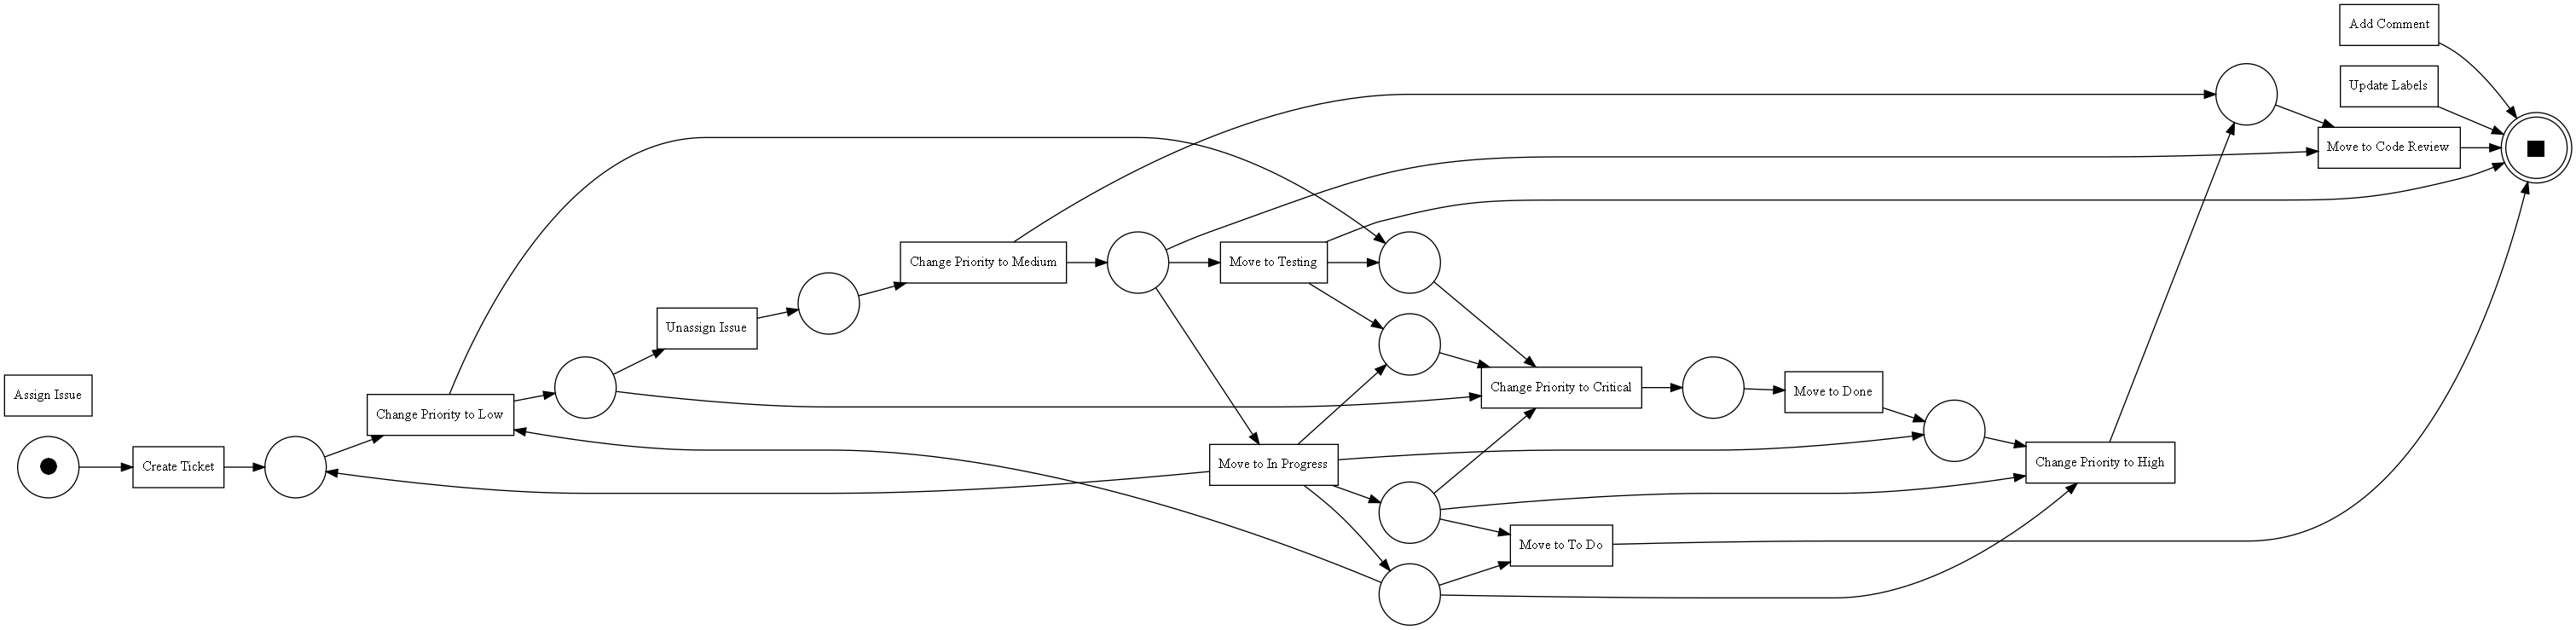

In [28]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

### Reading a Petri Net

A Petri net is a powerful graphical tool for modeling and analyzing processes. To read a Petri net effectively, focus on these key elements:

* Places (circles): Represent states or conditions in the process. They can hold tokens, which indicate the current state of the system.
* Transitions (rectangles or bars): Represent events or actions that cause the process to move from one state to another.
* Arcs (arrows): Connect places to transitions and transitions to places, showing the flow of the process.
* Tokens (small dots inside places): Indicate the current state of the process. The distribution of tokens across places is called the marking.
* Initial marking: The starting distribution of tokens, representing the initial state of the process.
* Final marking: The desired end state of the process.

To interpret the Petri net:
* Follow the flow of tokens through the net.
* A transition can fire when all its input places have tokens.
* When a transition fires, it consumes tokens from its input places and produces tokens in its output places.
* Parallel paths indicate concurrent activities.
* Choice points are represented by places with multiple outgoing arcs.

By analyzing the Petri net, you can understand the process flow, identify potential bottlenecks, and verify the correctness of the process model. This visualization provides valuable insights into the behavior and structure of complex systems or workflows.

## Adding data to Petri net
### Frequency

replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

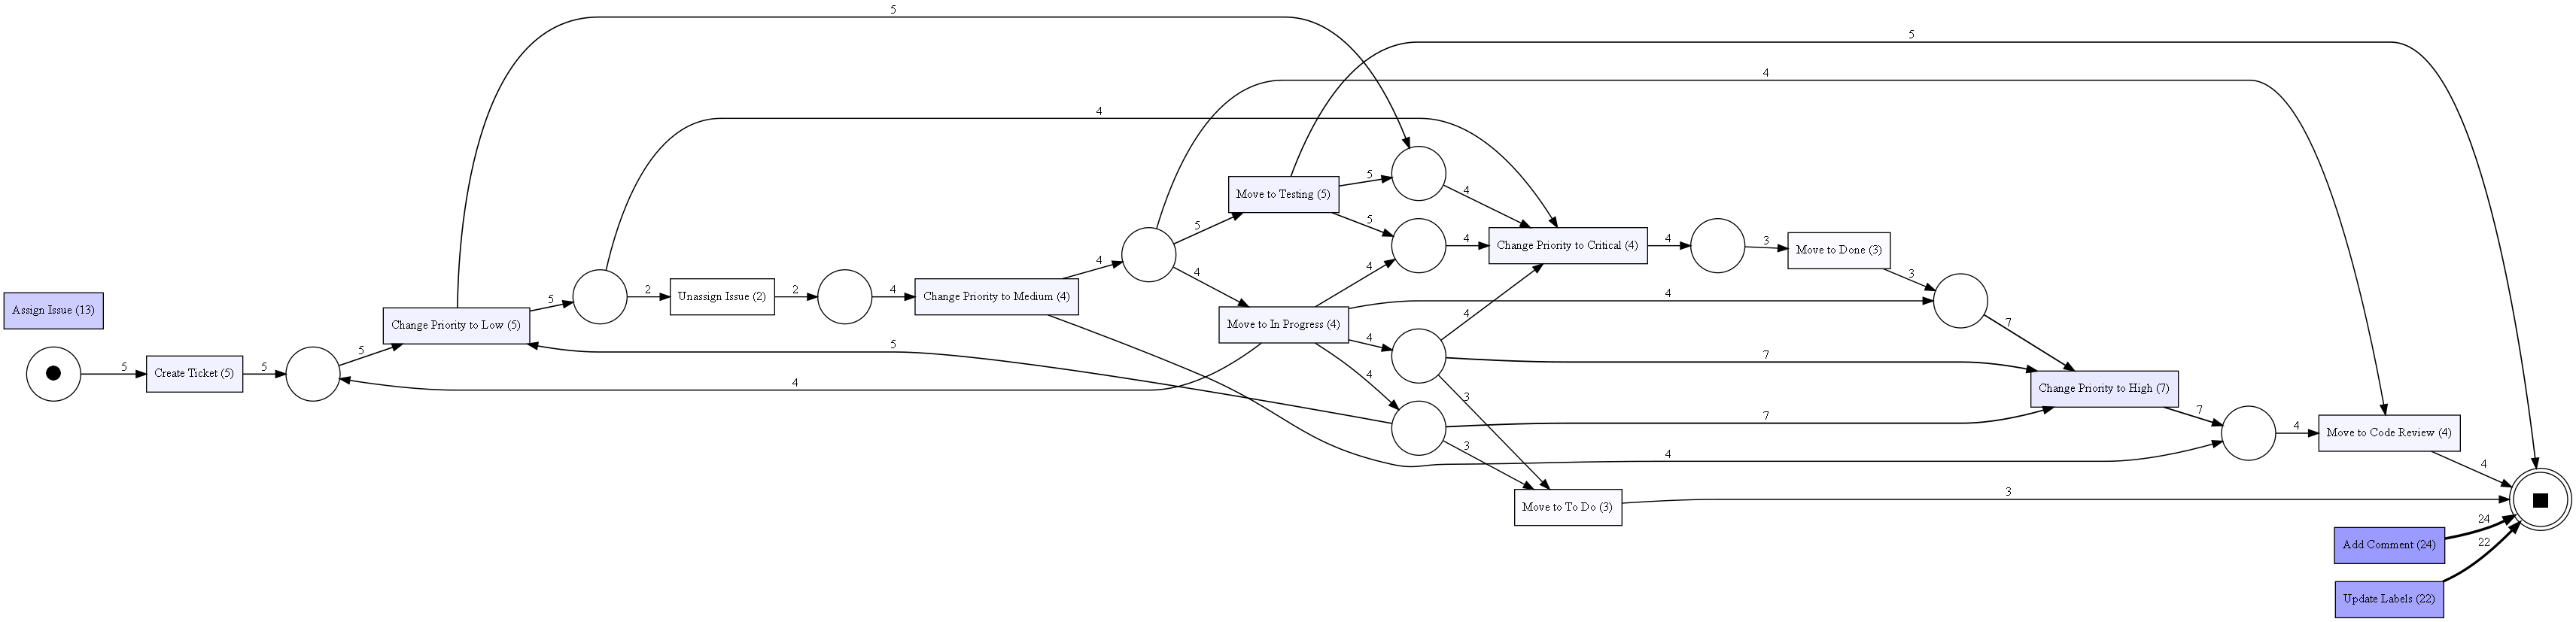

In [29]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking,
                           variant=pn_visualizer.Variants.FREQUENCY,                             
                           log=event_log)
pn_visualizer.view(gviz)


# or save as png
# pn_visualizer.save(gviz, "inductive_frequency.png")

# Inductive
Inductive miner models usually make extensive use of hidden transitions, especially for skipping/looping on a portion on the model. Furthermore, each visible transition has a unique label (there are no transitions in the model that share the same label).

Two process models can be derived: Petri Net and Process Tree.

## Petri net model


replaying log with TBR, completed traces ::   0%|          | 0/5 [00:00<?, ?it/s]

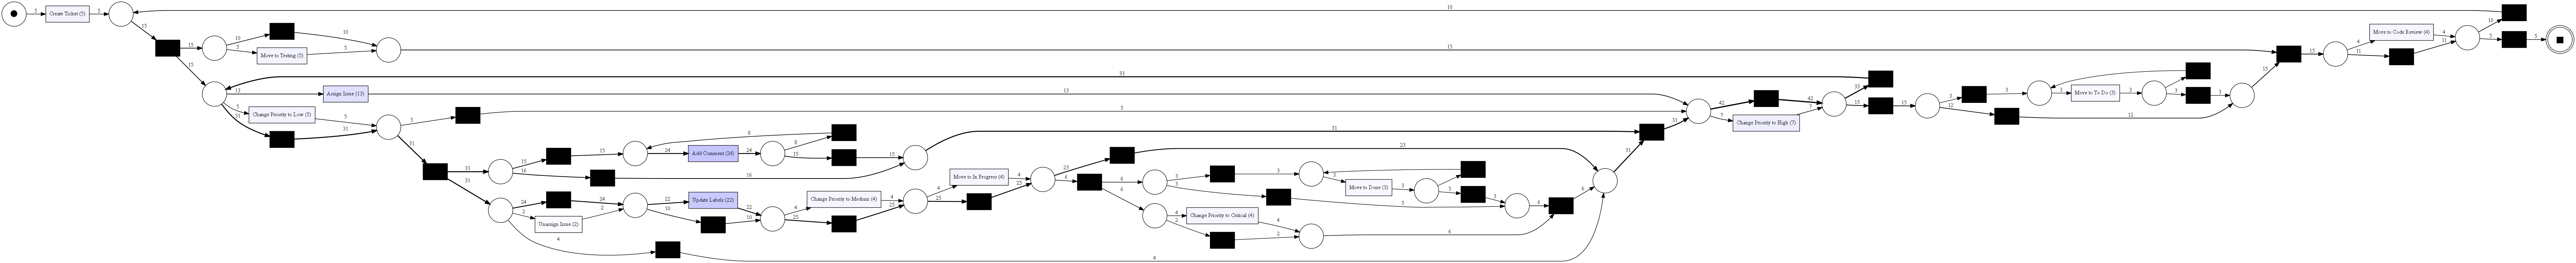

In [30]:
net, initial_marking, final_marking = discover_petri_net_inductive(event_log)
gviz = pn_visualizer.apply(net, initial_marking, final_marking, variant=pn_visualizer.Variants.FREQUENCY, log=event_log)
pn_visualizer.view(gviz)

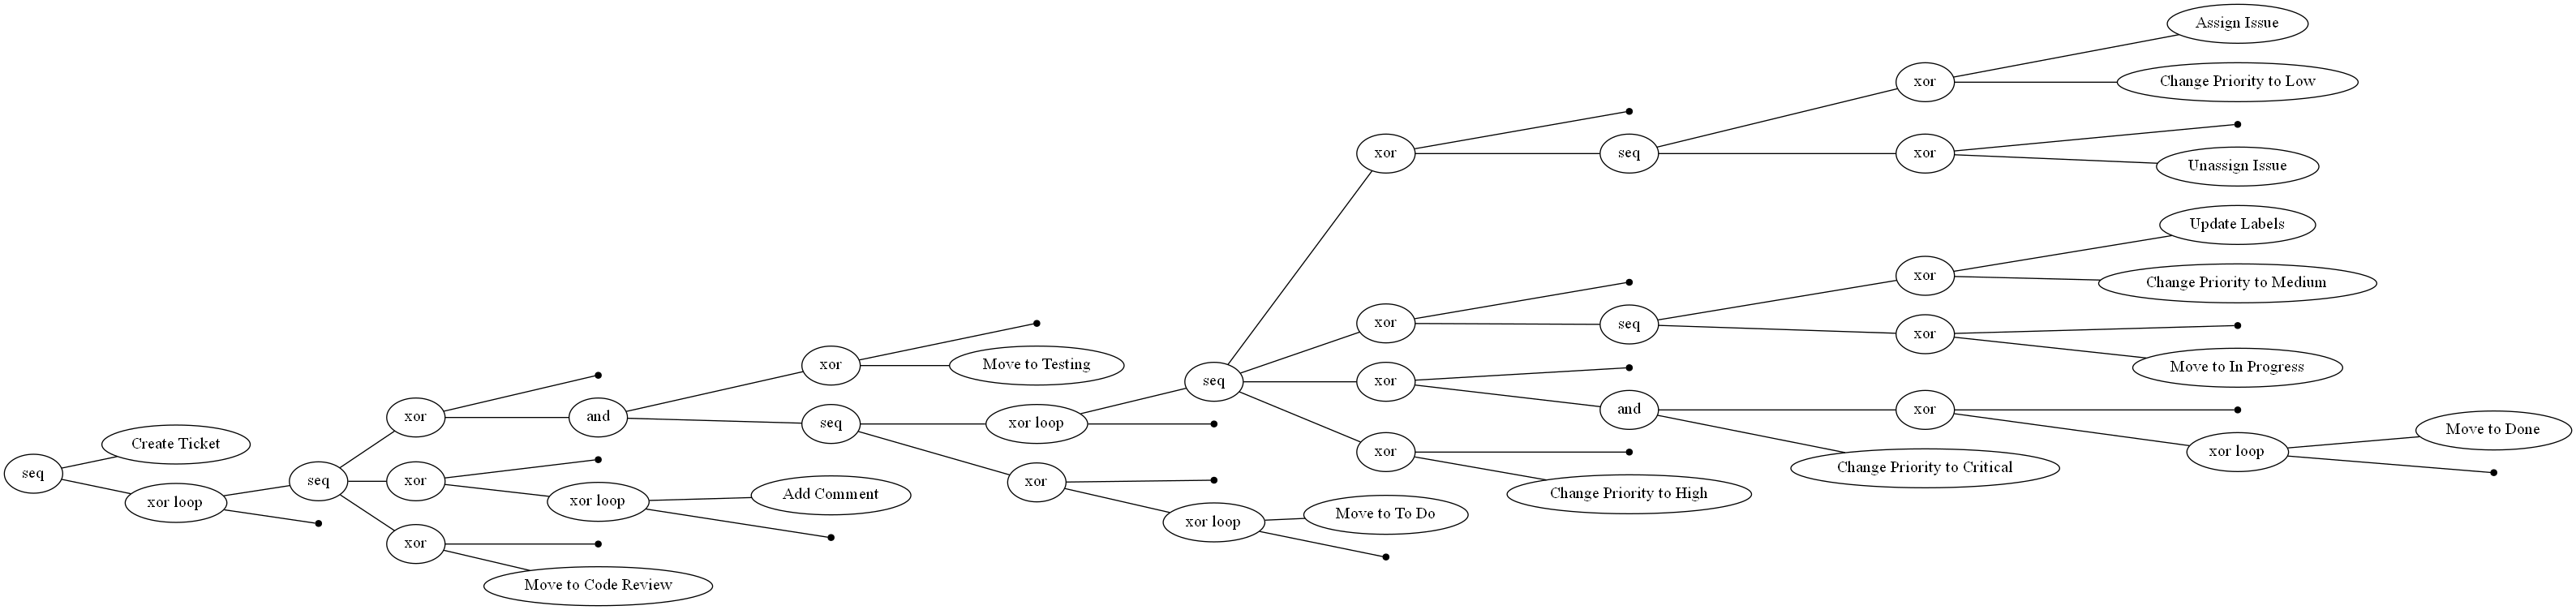

In [31]:
tree = discover_process_tree_inductive(event_log, noise_threshold=.2)
view_process_tree(tree)

In [34]:
from pm4py import convert_to_bpmn

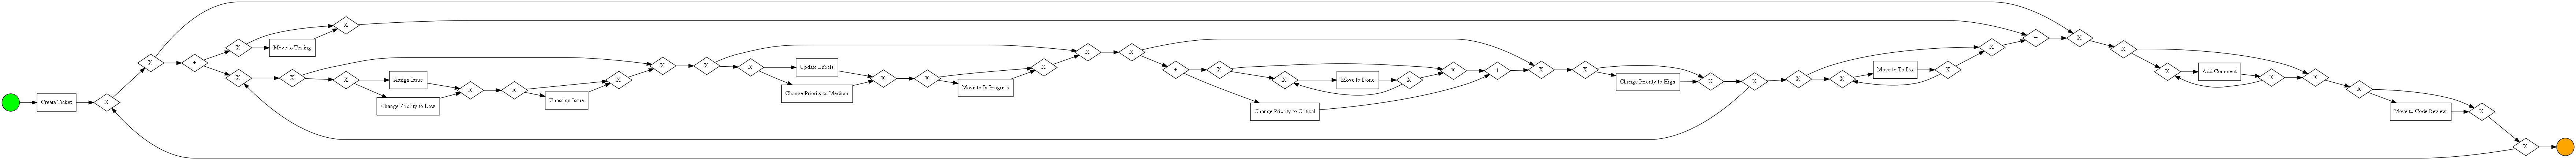

In [36]:
# bpmn & viz bpmn
bpmn_model = convert_to_bpmn(tree)

gviz = bpmn_visualizer.apply(bpmn_model)
bpmn_visualizer.view(gviz)

# Heuristics
Heuristics Miner is an algorithm that acts on the Directly-Follows Graph, providing way to handle with noise and to find common constructs (dependency between two activities, AND). The output of the Heuristics Miner is an Heuristics Net, so an object that contains the activities and the relationships between them. The Heuristics Net can be then converted into a Petri net. 

In [37]:
from pm4py import discover_heuristics_net, view_heuristics_net
heu_net = discover_heuristics_net(event_log, dependency_threshold=.99)
view_heuristics_net(heu_net)

Interpreting the Heuristics Graph:

Nodes: Each node represents an activity in your ticket lifecycle, such as "Ticket Created", "Ticket Assigned", or "Ticket Resolved".

Edges: The arrows between nodes show the flow between activities. Thicker edges indicate more frequent transitions.

Numbers on edges: These represent the frequency of transitions between activities. Higher numbers indicate more common paths in your process.

Colors: Often, colors are used to indicate the frequency or importance of activities or transitions. Warmer colors (reds, oranges) typically represent higher frequency or importance.

Start and end activities: Look for nodes with only outgoing or incoming edges to identify the typical start and end points of your process.

Loops: Cycles in the graph indicate repetitive processes, such as tickets being reopened or reassigned.

Parallel activities: Multiple outgoing edges from a single node suggest parallel or optional activities in your process.

By analyzing this graph, you can identify the most common paths in your ticket handling process, potential bottlenecks, and areas where the process might be optimized. It's a powerful tool for understanding and improving your workflow efficiency.

### Adjusting the Dependency Threshold
The dependency_threshold in pm4py.discover_heuristics_net is a parameter that controls the strength of dependencies between activities in the discovered heuristics net. It determines which connections between activities are included in the final model.

A higher threshold value results in a simpler model with fewer connections, as only the strongest dependencies are included. Conversely, a lower threshold produces a more complex model with more connections, capturing weaker dependencies between activities.

This parameter allows you to fine-tune the level of detail in your heuristics net, balancing between simplicity and completeness of the discovered process model. It's particularly useful when dealing with noisy event logs or when you want to focus on the most significant process paths.

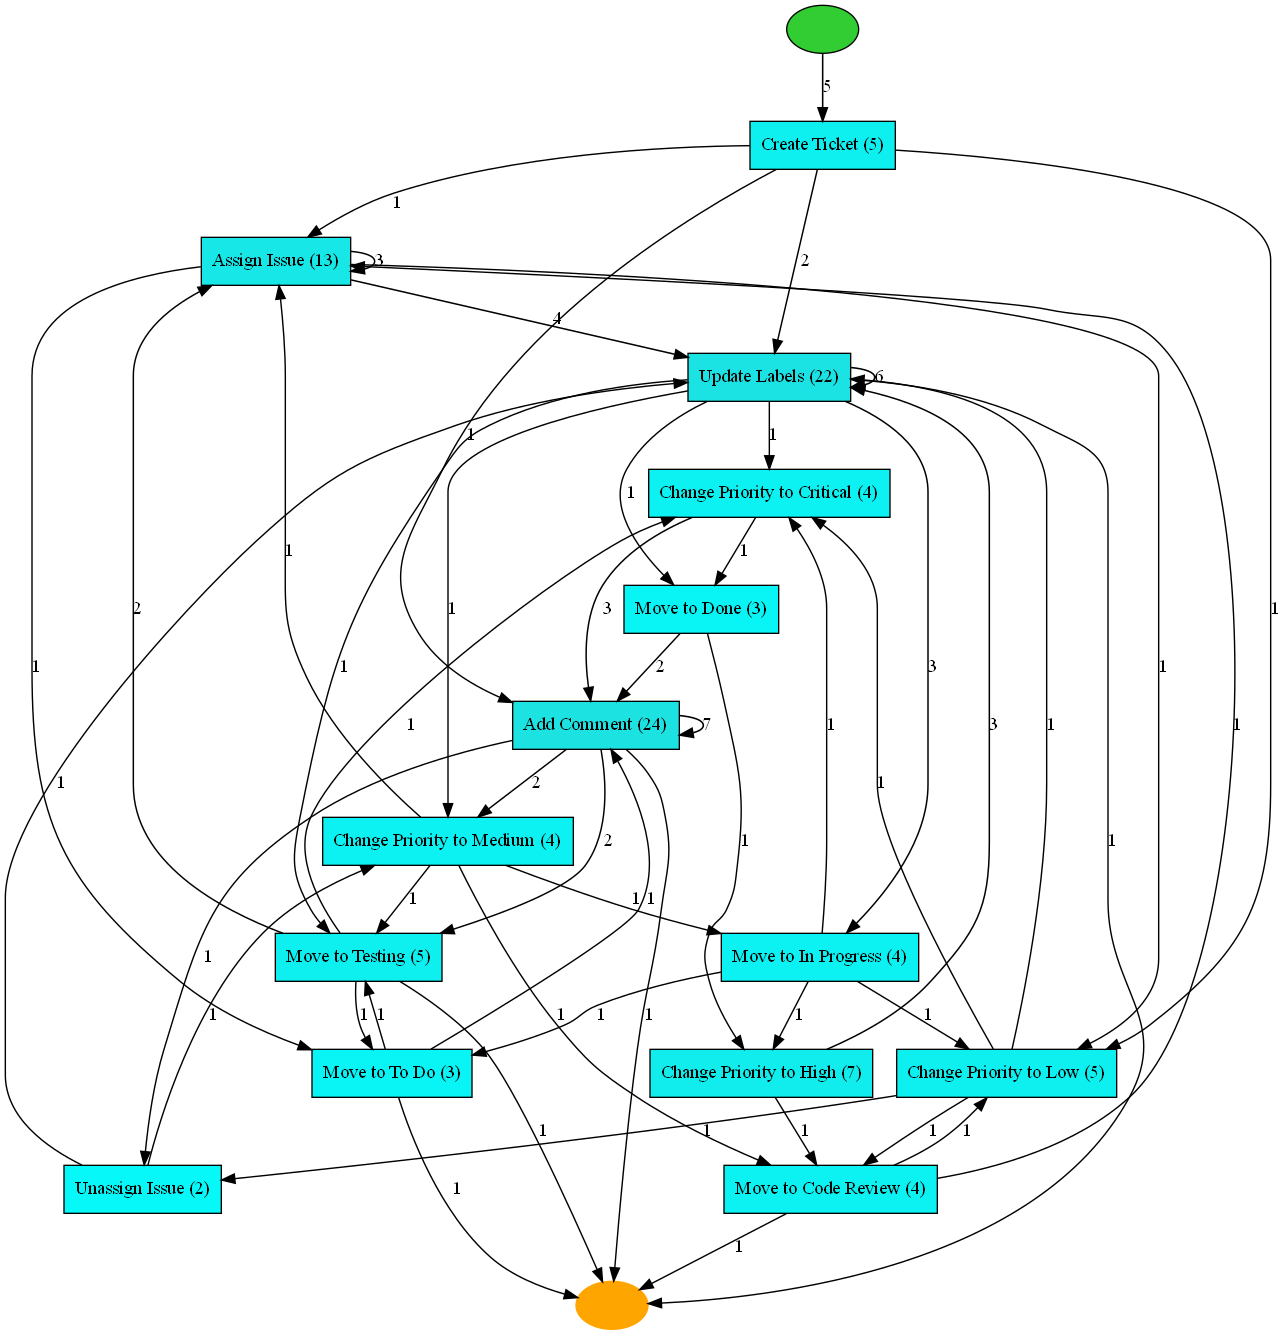

In [38]:
heu_net = discover_heuristics_net(event_log, dependency_threshold=0.1)
view_heuristics_net(heu_net)

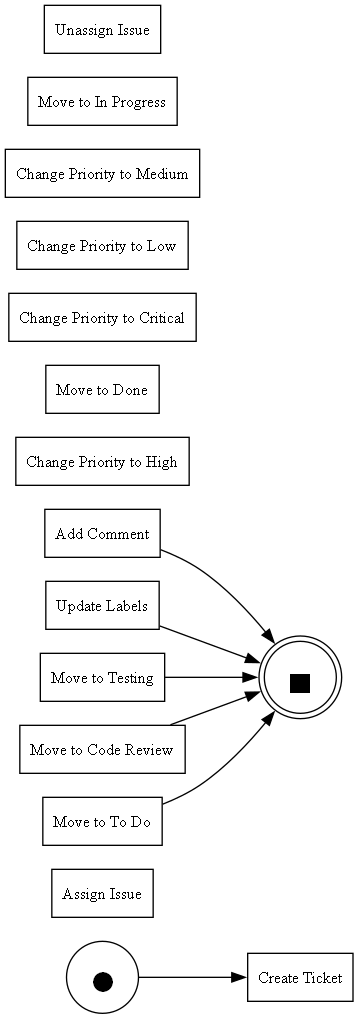

In [33]:
net, im, fm = discover_petri_net_heuristics(event_log, dependency_threshold=.99)
view_petri_net(net, im, fm)

# Temporal Profile Discovery
The temporal_profile_discovery in PM4Py is a powerful tool for analyzing the time-related aspects of a process. It calculates the time intervals between different activities in the process, providing insights into the temporal behavior of the process.

The output of temporal_profile_discovery is a dictionary where the keys are pairs of activities (representing the transition from one activity to another), and the values are statistical summaries of the time intervals between these activities. These summaries typically include:

min: Minimum time interval
max: Maximum time interval
median: Median time interval
mean: Average time interval
std: Standard deviation of time intervals
To interpret the output:

Look at the activity pairs to understand the process flow.
Examine the statistical measures to gain insights into the timing between activities.
Use the min and max values to identify extreme cases.
Compare median and mean values to understand the typical time between activities.
Use the standard deviation to gauge the variability in timing.
This information is valuable for identifying bottlenecks, understanding process variability, and setting realistic expectations for process durations. It's a key component in process optimization and performance analysis.

In [39]:
temporal_profile = temporal_profile_discovery.apply(event_log)
temporal_profile

{('Create Ticket', 'Assign Issue'): (3264424.6153846155, 2247942.678556756),
 ('Create Ticket', 'Change Priority to High'): (3961302.8571428573,
  1915450.1818781774),
 ('Create Ticket', 'Update Labels'): (3058982.727272727, 2031488.7093369819),
 ('Create Ticket', 'Add Comment'): (3295377.5, 2343034.862835601),
 ('Create Ticket', 'Move to Done'): (2795180.0, 410793.9220582505),
 ('Create Ticket', 'Move to Testing'): (5152932.0, 2012036.8757356312),
 ('Assign Issue', 'Assign Issue'): (2823328.0, 1853027.3154227536),
 ('Assign Issue', 'Change Priority to High'): (2221058.1818181816,
  1745042.8053077562),
 ('Assign Issue', 'Update Labels'): (2581959.375, 2199473.558934321),
 ('Assign Issue', 'Add Comment'): (2255397.6923076925, 1853175.0298540236),
 ('Assign Issue', 'Move to Done'): (1927290.0, 675385.970982519),
 ('Assign Issue', 'Move to Testing'): (3361950.0, 1885214.996121132),
 ('Change Priority to High', 'Update Labels'): (2343021.4285714286,
  1876078.1114534452),
 ('Change Priori

### Summary of statistics without the filter 
- filter included only tickets that completed the process

- The replaying log message indicates that the algorithm is processing 935 variants of the process. This suggests a diverse set of paths through your JIRA ticket lifecycle.

- The dataframe shows individual events in the JIRA ticket lifecycle. Each row represents an action taken on a ticket, such as creation, status changes, and assignments.

- The 'start' and 'end' dictionaries show the frequency of different activities at the beginning and end of ticket lifecycles. For example, 'Ticket Created' is always the start (8797 times), while 'Ticket Closed' is the most common end (5740 times).

- The temporal profile output shows the time intervals between different activities. For instance, the mean time between 'Ticket Created' and 'Ticket Triage' is about 21,623 seconds (about 6 hours), with a standard deviation of 51,513 seconds.

- The median resolve time is about 7 minutes, which is quite fast for ticket resolution.

- The crosstab analysis shows the distribution of activities across different assignees, giving insights into workload distribution.

This data provides valuable insights into your JIRA ticket process, including:

- Typical paths tickets follow
- Time taken between different stages
- Workload distribution among team members
- Potential bottlenecks or delays in the process
- These insights can be used to optimize your ticket handling process, balance workloads, and identify areas for improvement in your team's efficiency.

In [35]:
# first_five = list(set(df['org:resource'].tolist()))[0:5]
# dd = df[df['org:resource'].isin(first_five)]

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the crosstab
crosstab = pd.crosstab(df['concept:name'], df['org:resource'], normalize='index')
crosstab


org:resource                 Alex Johnson  David Kim  Jane Doe  John Smith  \
concept:name                                                                 
Add Comment                      0.208333   0.125000  0.291667    0.250000   
Assign Issue                     0.076923   0.307692  0.307692    0.230769   
Change Priority to Critical      0.750000   0.000000  0.000000    0.250000   
Change Priority to High          0.000000   0.142857  0.142857    0.571429   
Change Priority to Low           0.200000   0.400000  0.400000    0.000000   
Change Priority to Medium        0.000000   0.500000  0.000000    0.250000   
Create Ticket                    0.000000   0.400000  0.000000    0.400000   
Move to Code Review              0.250000   0.250000  0.000000    0.250000   
Move to Done                     0.000000   0.000000  0.333333    0.333333   
Move to In Progress              0.000000   0.000000  0.500000    0.500000   
Move to Testing                  0.200000   0.200000  0.400000    0.000000   
Move to To Do                    0.000000   0.000000  1.000000    0.000000   
Unassign Issue                   0.500000   0.000000  0.500000    0.000000   
Update Labels                    0.090909   0.181818  0.272727    0.227273   

org:resource                 Maria Garcia  
concept:name                               
Add Comment                      0.125000  
Assign Issue                     0.076923  
Change Priority to Critical      0.000000  
Change Priority to High          0.142857  
Change Priority to Low           0.000000  
Change Priority to Medium        0.250000  
Create Ticket                    0.200000  
Move to Code Review              0.250000  
Move to Done                     0.333333  
Move to In Progress              0.000000  
Move to Testing                  0.200000  
Move to To Do                    0.000000  
Unassign Issue                   0.000000  
Update Labels                    0.227273

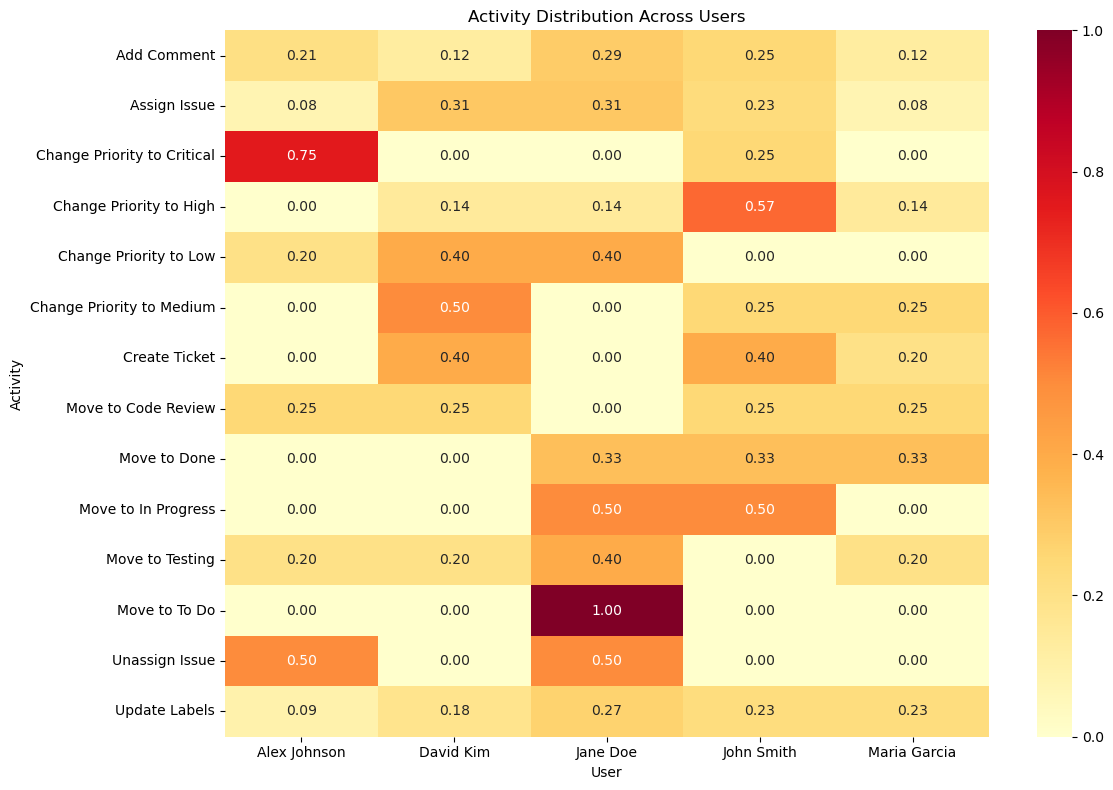

In [41]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Activity Distribution Across Users')
plt.ylabel('Activity')
plt.xlabel('User')
plt.tight_layout()
plt.show()


### Calculating Time Intervals
We use the temporal_profile_discovery algorithm to calculate the time intervals between different activities in our process.

In [42]:
from pm4py.algo.discovery.temporal_profile import algorithm as temporal_profile_discovery

temporal_profile = temporal_profile_discovery.apply(event_log)

### Interpreting the Results 
The output is a dictionary where keys are pairs of activities, and values are statistical summaries of time intervals between these activities.

In [47]:
temporal_profile_days = {}
for k, v in temporal_profile.items():
    temporal_profile_days[k] = (v[0]/86400, v[1]/86400)

In [49]:

for (act1, act2), stats in temporal_profile_days.items():
    print(f"From {act1} to {act2}:")
    print(f"  Mean time: {stats[0]} seconds")
    print(f"  Standard deviation: {stats[1]} seconds")

From Create Ticket to Assign Issue:
  Mean time: 37.78269230769231 seconds
  Standard deviation: 26.01785507588838 seconds
From Create Ticket to Change Priority to High:
  Mean time: 45.8484126984127 seconds
  Standard deviation: 22.169562290256682 seconds
From Create Ticket to Update Labels:
  Mean time: 35.40489267676767 seconds
  Standard deviation: 23.512600802511365 seconds
From Create Ticket to Add Comment:
  Mean time: 38.14094328703704 seconds
  Standard deviation: 27.11845906059723 seconds
From Create Ticket to Move to Done:
  Mean time: 32.35162037037037 seconds
  Standard deviation: 4.754559283081603 seconds
From Create Ticket to Move to Testing:
  Mean time: 59.64041666666667 seconds
  Standard deviation: 23.28746383953277 seconds
From Assign Issue to Assign Issue:
  Mean time: 32.67740740740741 seconds
  Standard deviation: 21.447075409985572 seconds
From Assign Issue to Change Priority to High:
  Mean time: 25.70669191919192 seconds
  Standard deviation: 20.19725469106199

Identifying Process Bottlenecks: Look for activity pairs with high median or mean times. These could indicate bottlenecks in your process.

Analyzing Process Variability: High standard deviations suggest inconsistent processing times, which might indicate process inefficiencies or complexities.

Visualizing Temporal Profiles: Create a heatmap to visualize the median times between activities:

      Activity 1               Activity 2  Mean Time
0  Create Ticket             Assign Issue  37.782692
1  Create Ticket  Change Priority to High  45.848413
2  Create Ticket            Update Labels  35.404893
3  Create Ticket              Add Comment  38.140943
4  Create Ticket             Move to Done  32.351620


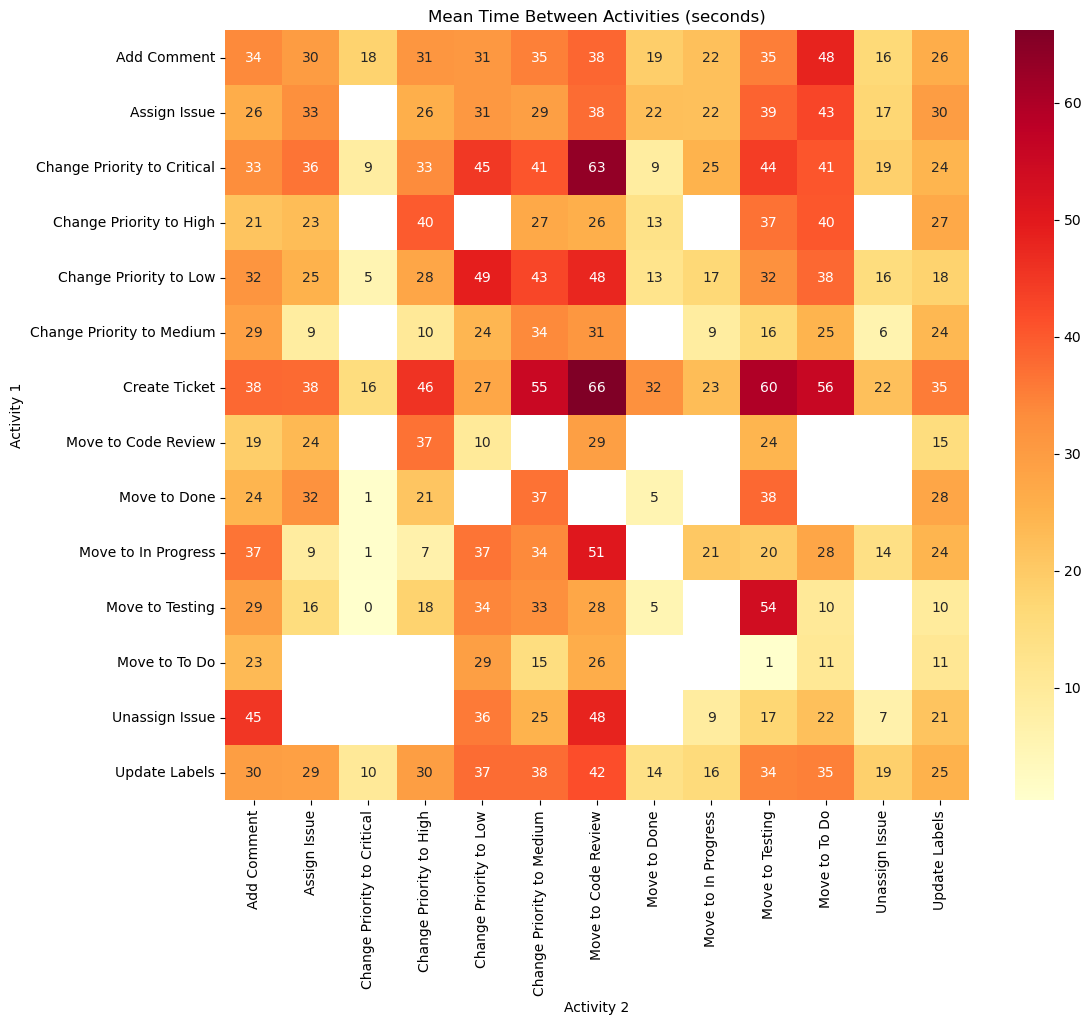

In [51]:
df_temporal = pd.DataFrame([(act1, act2, stats[0]) for (act1, act2), stats in temporal_profile_days.items()],
                           columns=['Activity 1', 'Activity 2', 'Mean Time'])
print(df_temporal.head())
df_pivot = df_temporal.pivot(index='Activity 1', columns='Activity 2', values='Mean Time')

plt.figure(figsize=(12, 10))
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Mean Time Between Activities (seconds)')
plt.show()

## Handover Process Mapping
The visualizations below show:
- Nodes: Team members/resources
- Edges: Work handovers between people
- Edge thickness: Frequency of handovers
- Edge labels: Handover weights

You can adjust the thresholds to focus on:
- Stronger collaborations (increase threshold)
- More detailed connections (decrease threshold)

This gives you a clear picture of how work flows between team members in your process.

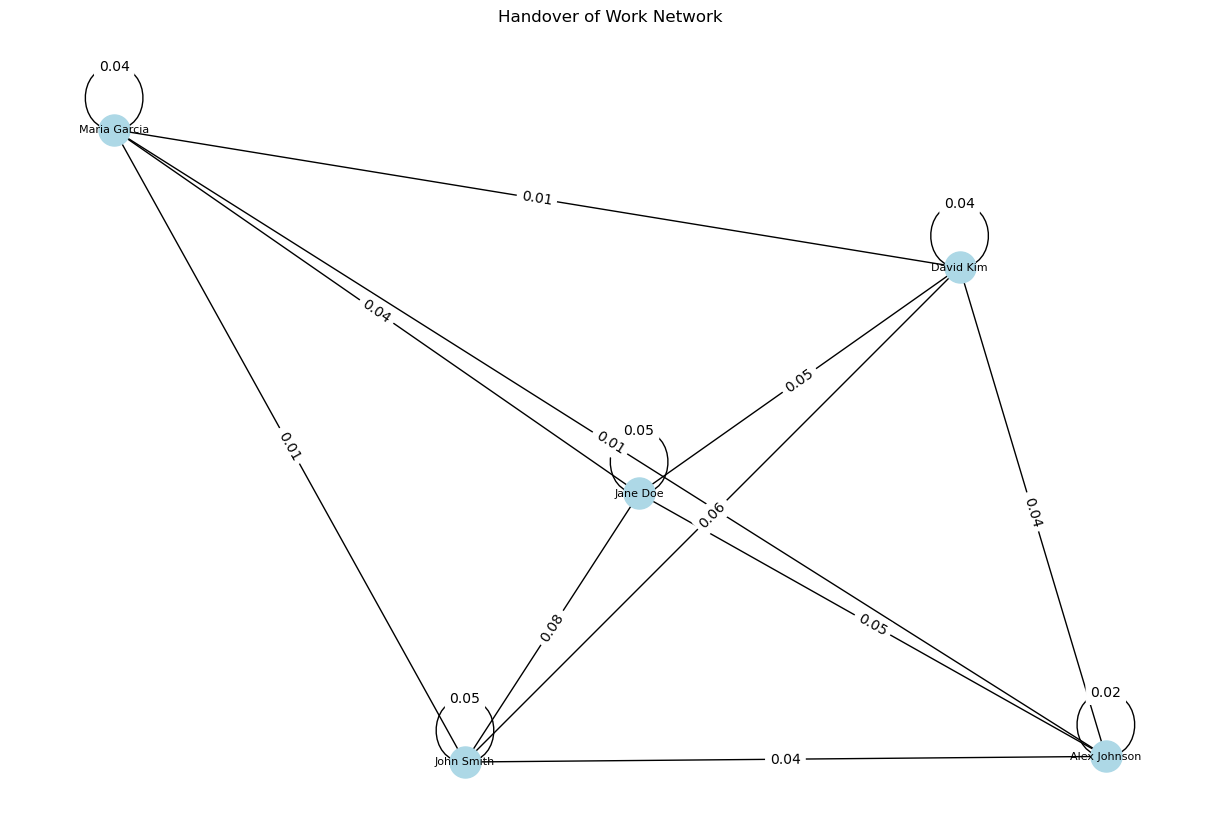

In [52]:
from pm4py.algo.organizational_mining.sna import algorithm as sna_algorithm
import matplotlib.pyplot as plt

# Convert relevant attributes to a consistent type (e.g., string)
for trace in event_log:
    for event in trace:
        for key in event.keys():
            event[key] = str(event[key])

# Now apply the handover network algorithm
handover_nw = sna_algorithm.apply(event_log, variant=sna_algorithm.Variants.HANDOVER_LOG)

network_data = handover_nw.__dict__['connections']

G = nx.Graph()
for (resource1, resource2), weight in network_data.items():
    if resource1 != 'nan' and resource2 != 'nan':
        G.add_edge(resource1, resource2, weight=weight)

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Handover of Work Network')
plt.show()

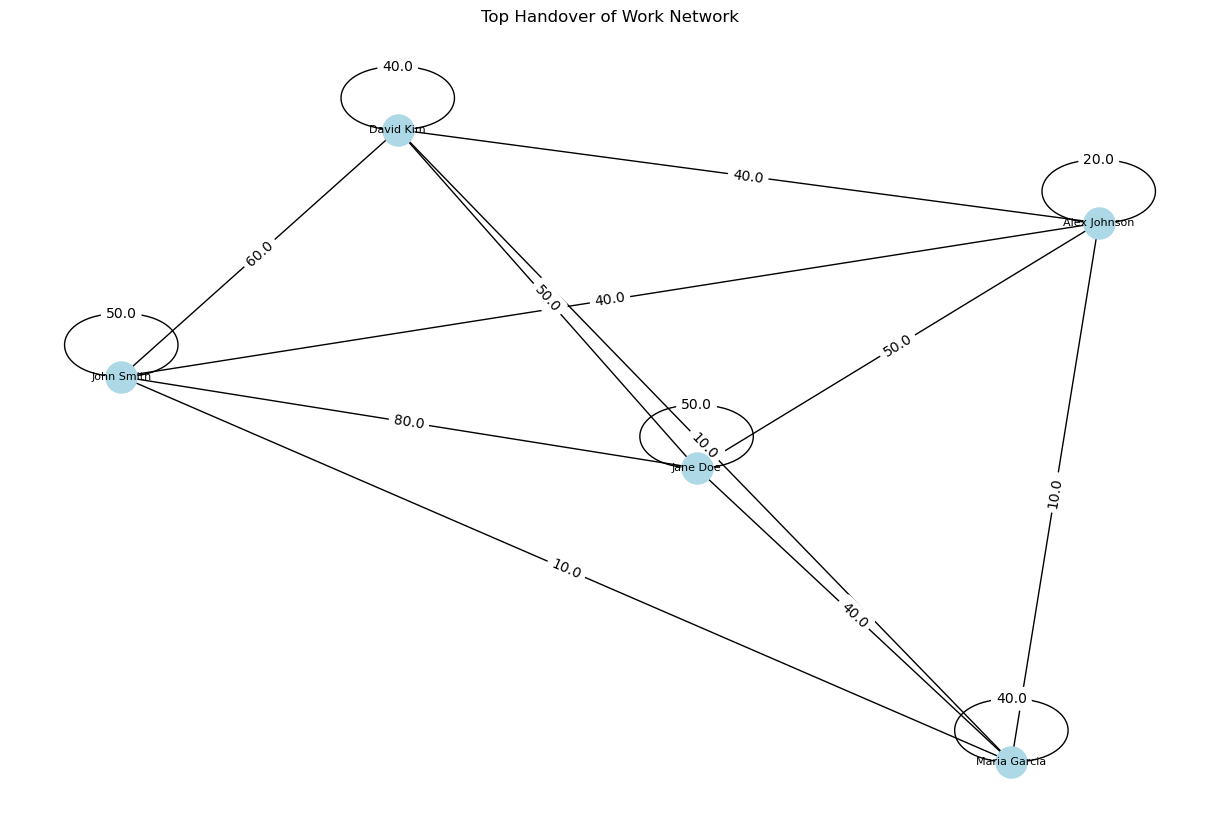

In [53]:
# Scale weights to percentages (0-100)
network_data = handover_nw.__dict__['connections']
scaled_data = {k: round(v * 100, 1) for k, v in network_data.items() if 'nan' not in k}

# Or scale to whole numbers (1-15)
scaled_data = {k: round(v * 1000, 0) for k, v in network_data.items() if 'nan' not in k}

# Use scaled data in visualization
G = nx.Graph()
for (resource1, resource2), weight in scaled_data.items():
    if weight > 0:
        G.add_edge(resource1, resource2, weight=weight)

# Limit the number of nodes to display
top_nodes = 10  # Adjust this value to show more or fewer nodes
degrees = dict(G.degree())
top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:top_nodes]
G = G.subgraph(top_nodes)

pos = nx.spring_layout(G)
plt.figure(figsize=(12, 8))
nx.draw(G, pos, 
        with_labels=True, 
        node_color='lightblue', 
        node_size=500, 
        font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Top Handover of Work Network')
plt.show()


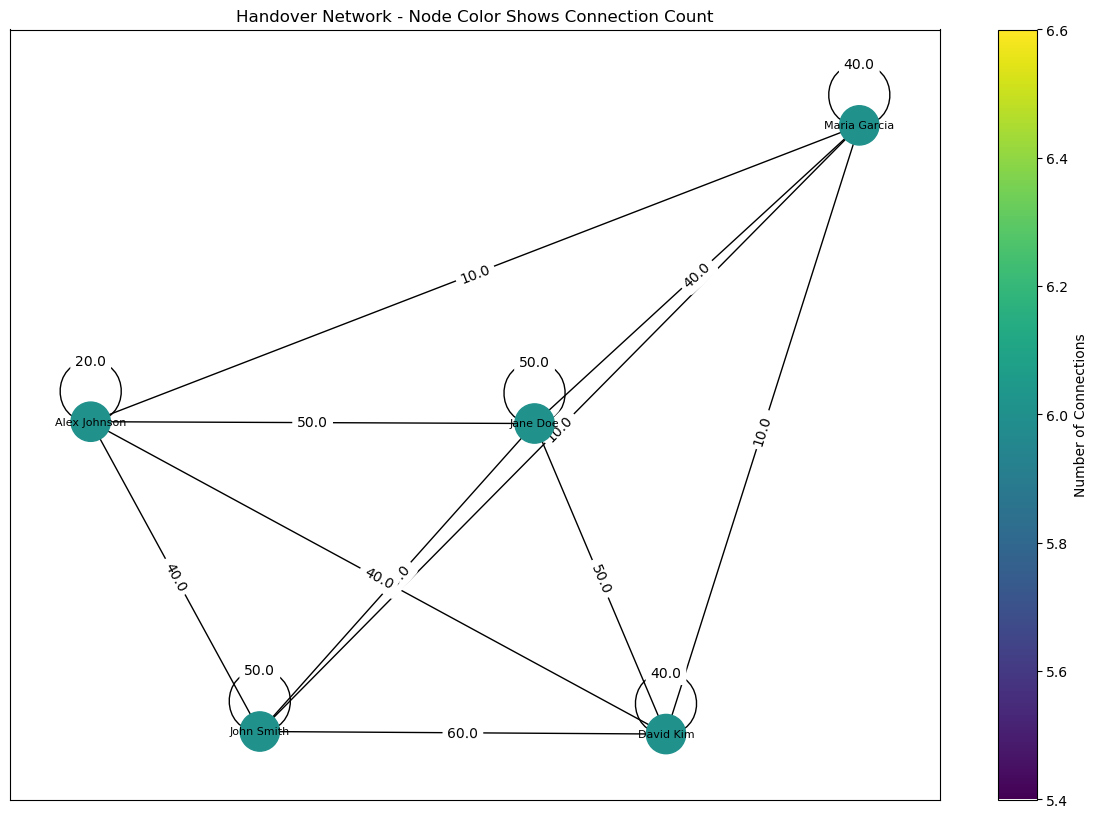

In [54]:
import matplotlib.colors as mcolors

# Calculate node degrees (number of connections)
degrees = dict(G.degree())

# Create color map based on degree
vmin = min(degrees.values())
vmax = max(degrees.values())
cmap = plt.cm.viridis  # Choose colormap (try 'YlOrRd', 'plasma', 'coolwarm')

# Draw network with colored nodes
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G)

nodes = nx.draw_networkx_nodes(G, pos,
                             node_color=list(degrees.values()),
                             node_size=800,
                             cmap=cmap,
                             vmin=vmin,
                             vmax=vmax)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Add colorbar legend
plt.colorbar(nodes, label='Number of Connections')
plt.title('Handover Network - Node Color Shows Connection Count')
plt.show()

### Social Network Analysis of JIRA Ticket Handovers

* The weights in the network represent the frequency or strength of handovers between resources.
* A weight of 0.001 indicates that 0.1% of all handovers occur between these two resources.
* Higher weights (e.g., 0.05 or 5%) suggest frequent collaboration or handovers between those resources.
* Lower weights (e.g., 0.002 or 0.2%) indicate less frequent interactions.
This chart provides a clearer picture of the relative importance of different handover relationships in your JIRA ticket process, helping identify key collaborations and potential bottlenecks in the workflow.

## Creating Custom Process Maps

Custom process maps allow for tailored visualizations of your JIRA ticket workflow, highlighting specific aspects of interest. Here's how to create insightful custom process maps:

* Define Activities of Interest: Select key activities from your event log that you want to focus on.
* Filter the Event Log: Create a filtered log containing only the selected activities.


In [55]:
from pm4py import filter_event_attribute_values
activities_of_interest = ['Create Ticket', 'Assign Issue']
filtered_log = filter_event_attribute_values(event_log, 'concept:name', activities_of_interest)

* Generate a Custom Directly-Follows Graph: Use the filtered log to create a DFG focused on your activities of interest.

In [56]:
custom_dfg = discover_directly_follows_graph(filtered_log)

* Enhance with Performance Metrics: Add performance information to your custom process map.

In [57]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.util import xes_constants as xes

# Ensure timestamps are in the correct format
for trace in filtered_log:
    for event in trace:
        if xes.DEFAULT_TIMESTAMP_KEY in event:
            event[xes.DEFAULT_TIMESTAMP_KEY] = pd.to_datetime(event[xes.DEFAULT_TIMESTAMP_KEY])

# Now apply the performance discovery
perf_dfg = dfg_discovery.apply(filtered_log, variant=dfg_discovery.Variants.PERFORMANCE)


* Visualize the Custom Process Map: Create a visual representation of your custom process map.

In [58]:
from pm4py.visualization.dfg import visualizer as dfg_visualizer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# Capture all returned values
dfg_output = dfg_discovery.apply(filtered_log)
custom_dfg = dfg_output  # The DFG is typically the first element


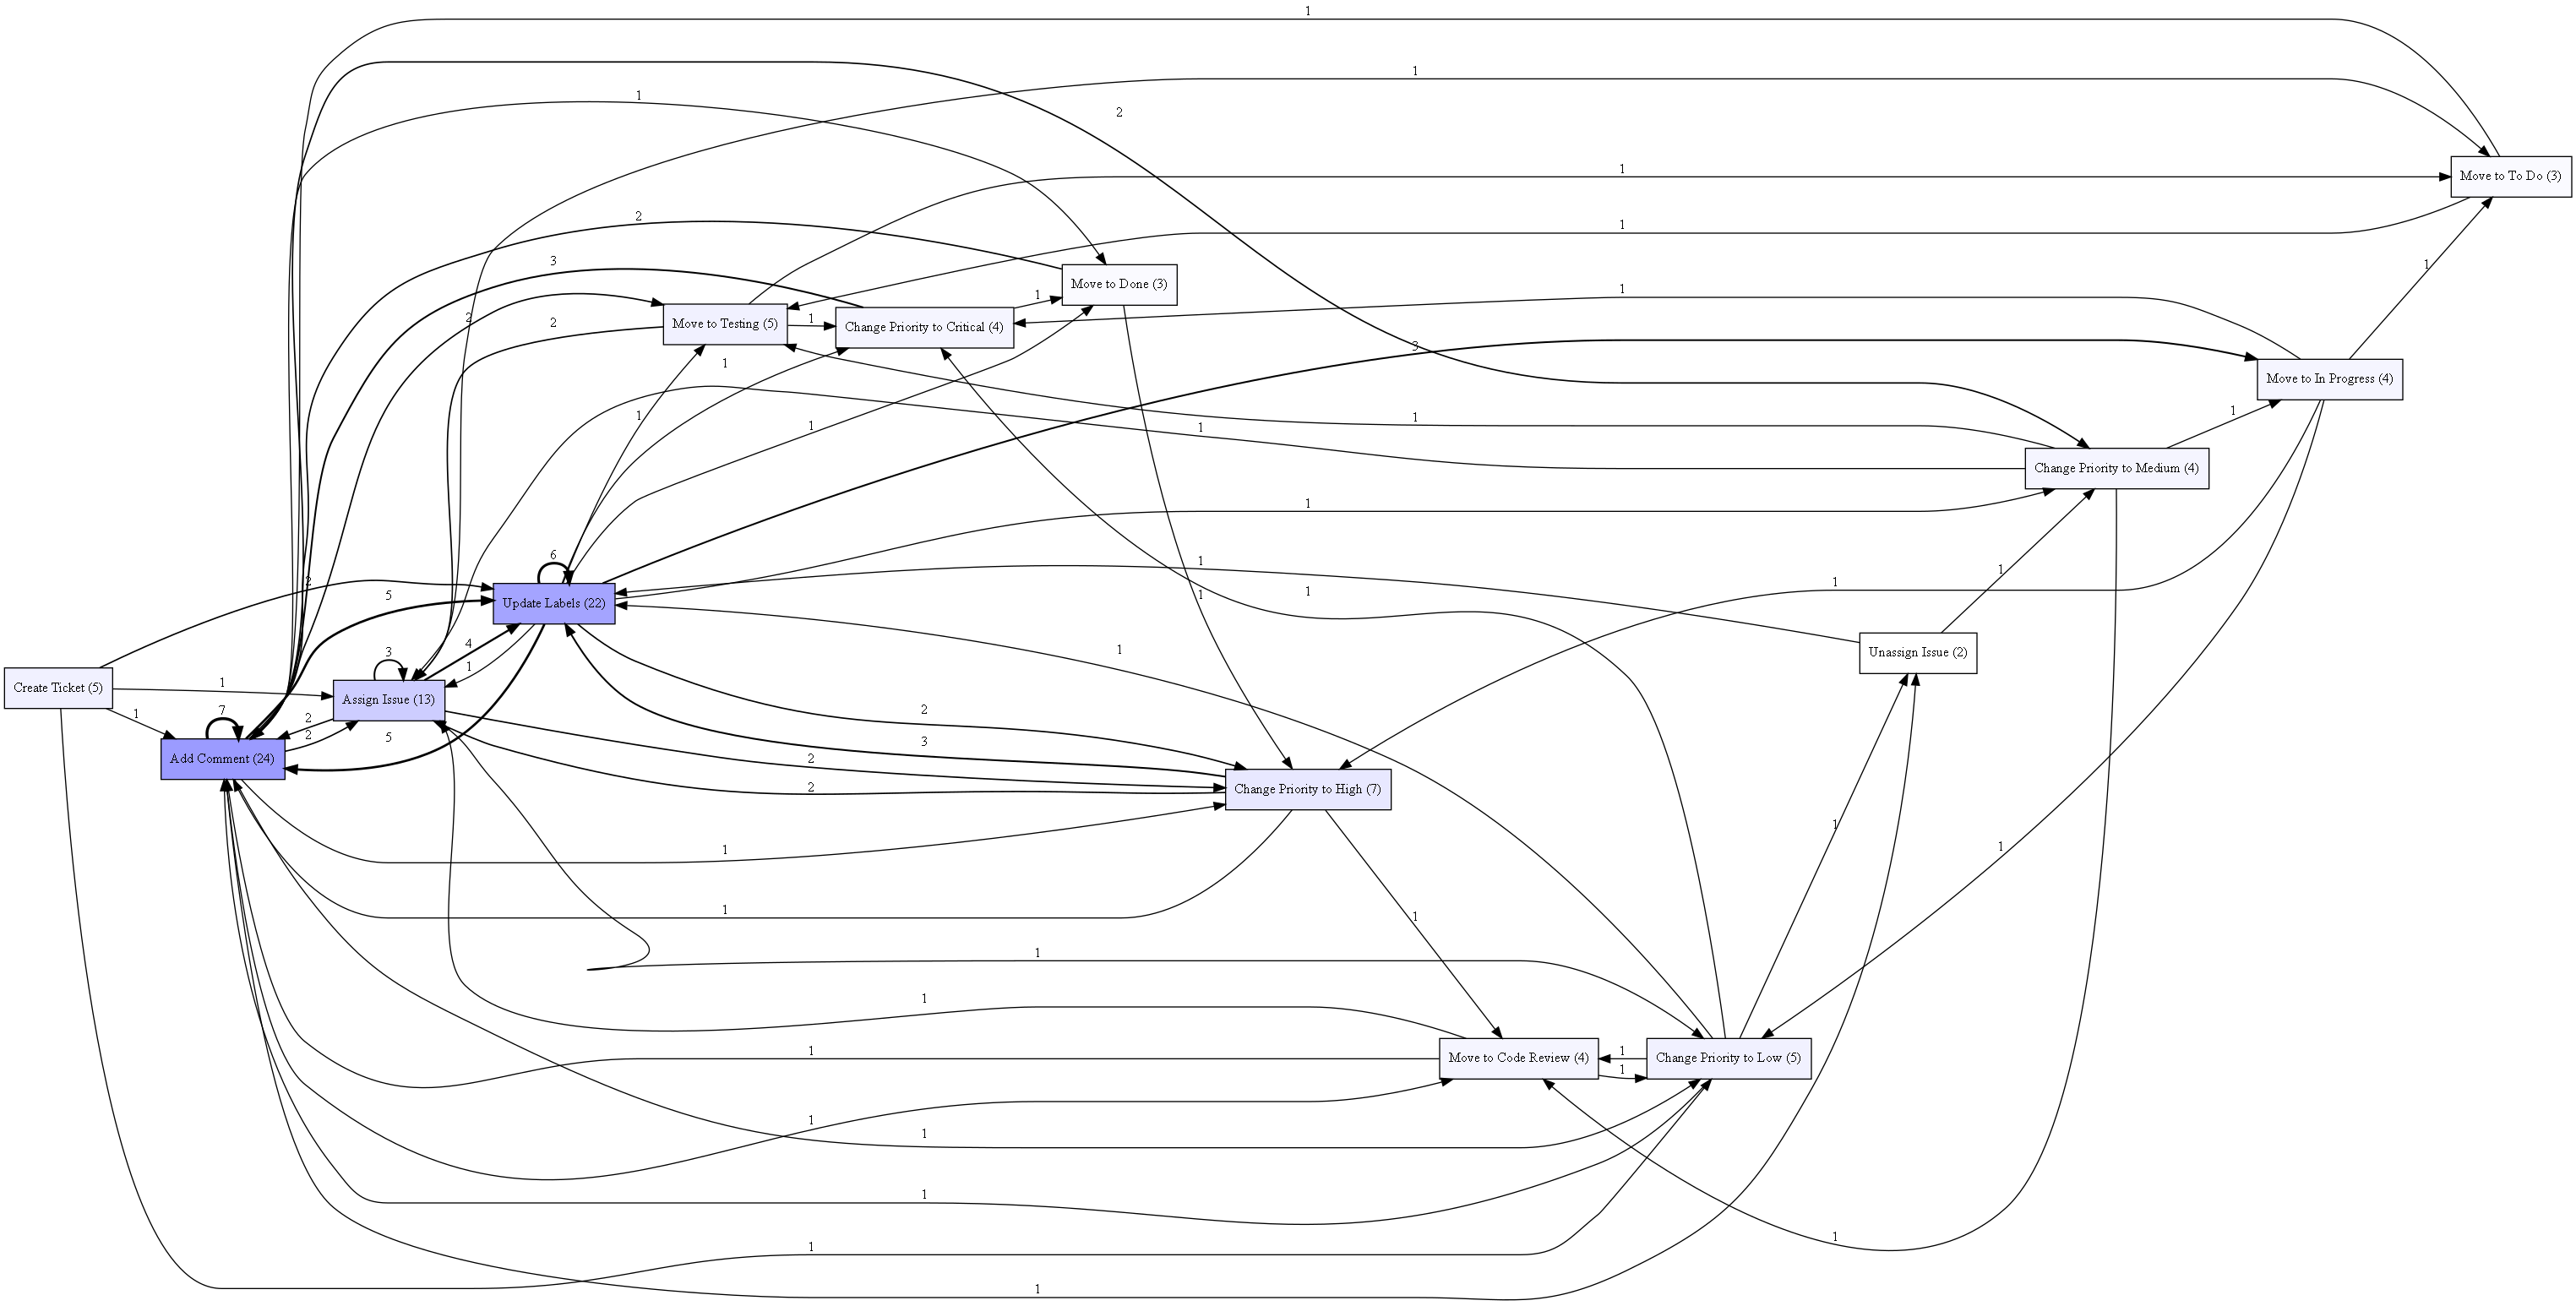

In [59]:
# Now visualize
gviz = dfg_visualizer.apply(custom_dfg, log=filtered_log, variant=dfg_visualizer.Variants.FREQUENCY, parameters={"format": "png"})
dfg_visualizer.view(gviz)

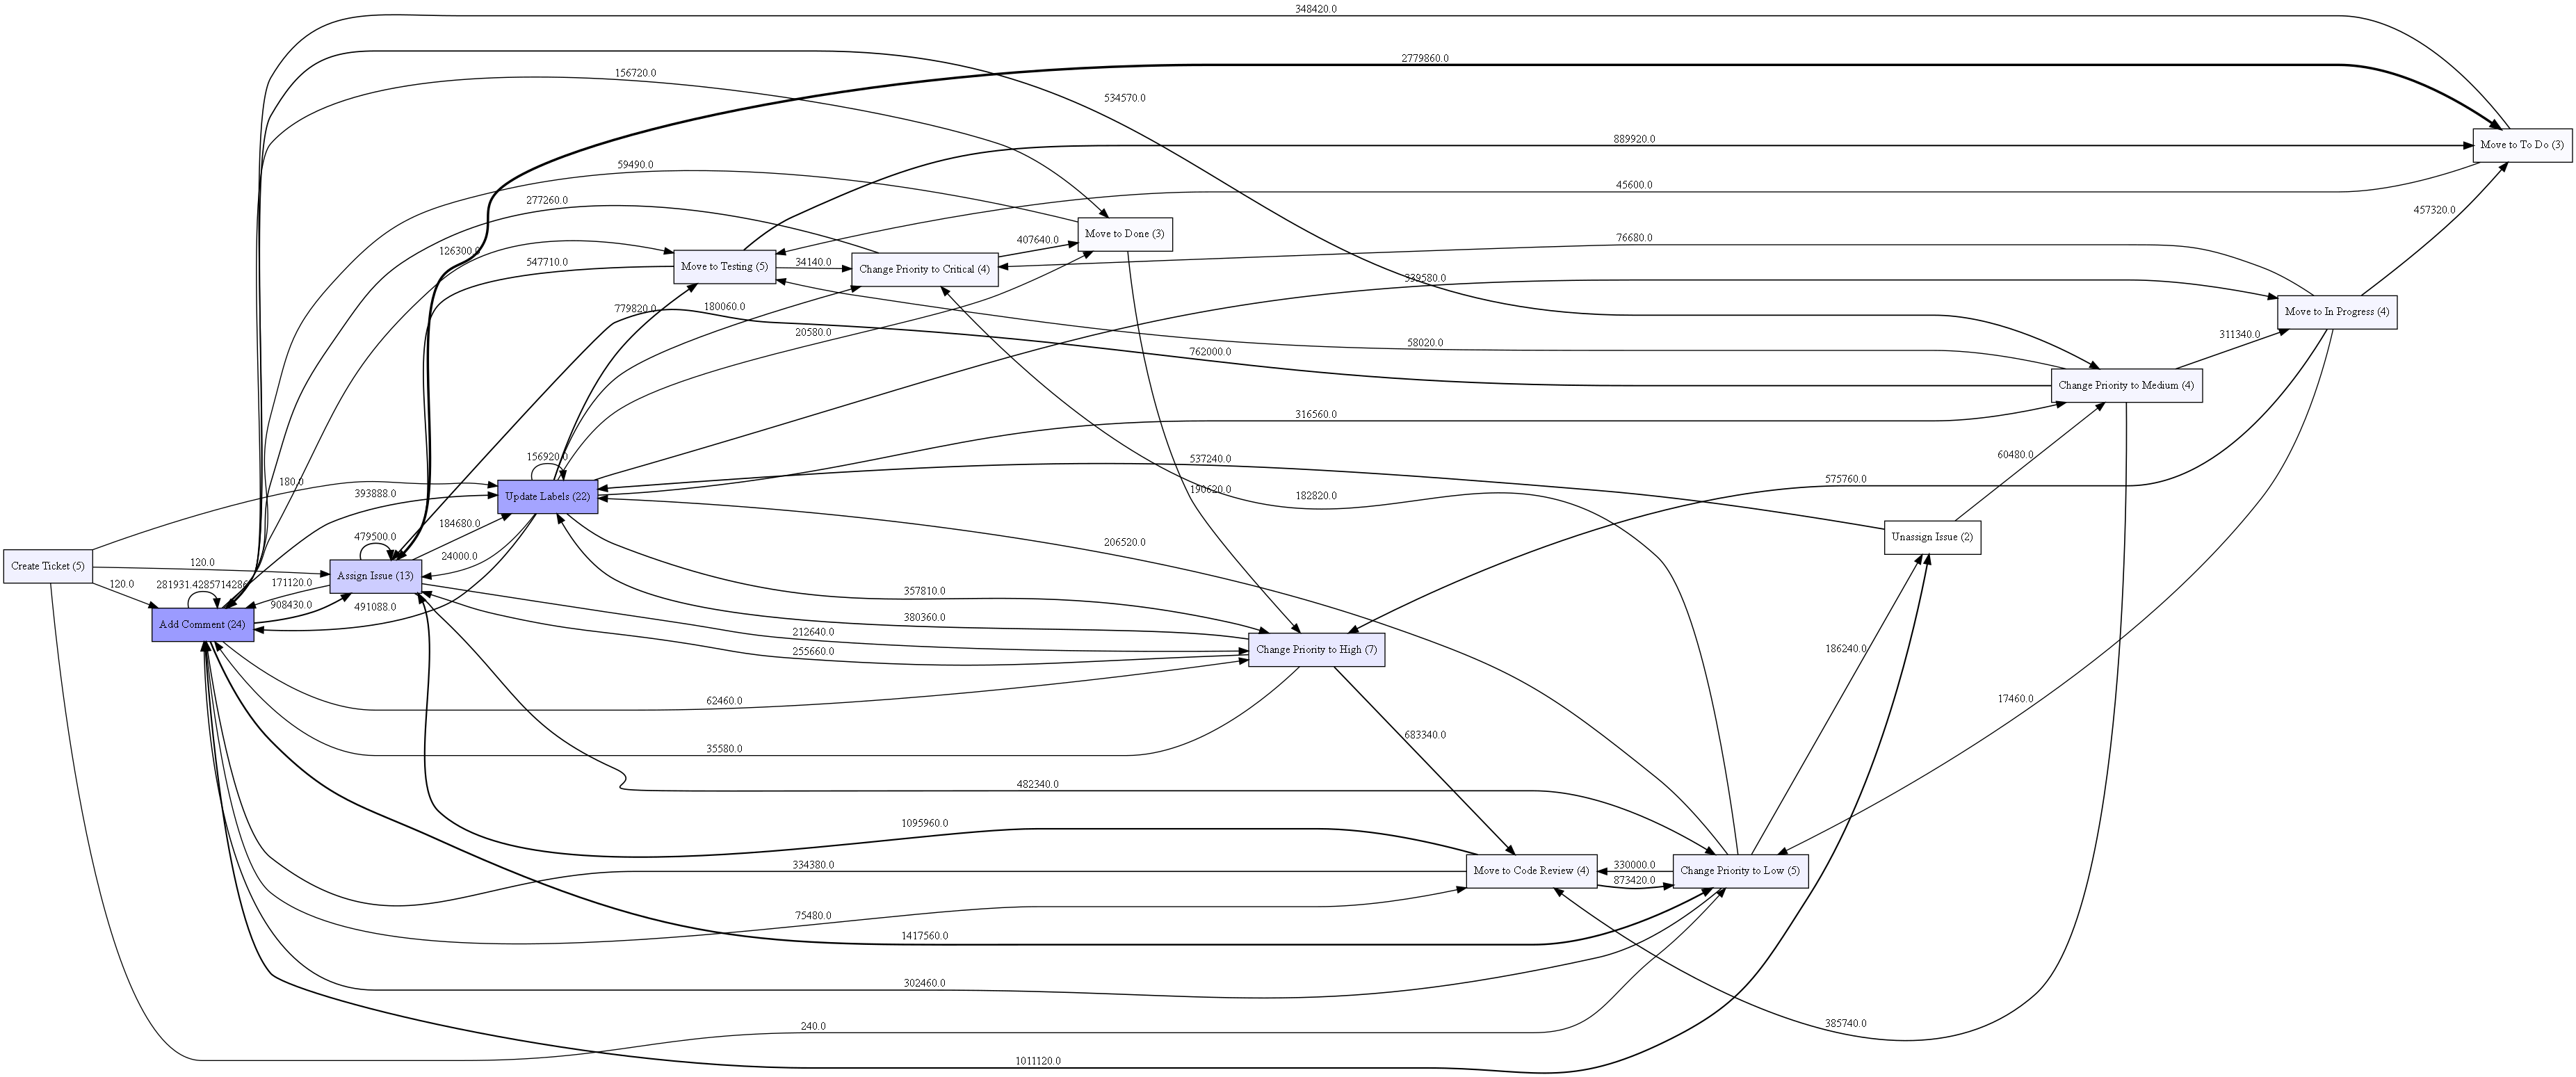

In [60]:
# perf_dfg = dfg_discovery.apply(filtered_log, variant=dfg_discovery.Variants.PERFORMANCE)
# Now visualize
gviz = dfg_visualizer.apply(perf_dfg, log=filtered_log, variant=dfg_visualizer.Variants.FREQUENCY, parameters={"format": "png"})
dfg_visualizer.view(gviz)

The graph generated from this code represents a Directly-Follows Graph (DFG) with frequency information. Here's how to interpret it:

* Nodes: Each node represents an activity in your process.

* Edges: Arrows between nodes show the flow of activities, indicating which activities directly follow others.

* Edge thickness: Thicker edges indicate more frequent transitions between activities.

* Node size: Larger nodes typically represent activities that occur more frequently in the process.

* Colors: Often, colors are used to highlight different aspects of the process, such as start activities (green) and end activities (orange).

* Numbers on edges: These represent the frequency of transitions between activities.

* Numbers in nodes: These often show how many times each activity occurs in the log.

This visualization provides a clear overview of your process flow, highlighting common paths and potential bottlenecks. It's particularly useful for identifying the most frequent activity sequences and understanding the overall structure of your process.

## Identifying improvement opportunities

Analyzing the process mining results from our JIRA ticket data reveals several areas for potential improvement:

#### Bottleneck Activities:

* Examine activities with high processing times in the performance DFG.
* Focus on reducing time spent in these activities to improve overall process efficiency.

#### Frequent Handovers:

* Analyze the social network graph to identify resources with numerous handovers.
* Consider streamlining workflows or cross-training team members to reduce unnecessary handovers.

#### Variant Analysis:

* Identify the most common process variants and compare them to less frequent ones.
* Standardize processes based on efficient variants to improve overall performance.

#### Rework Loops:

* Look for cycles in the process map, particularly involving 'Ticket Reopened' events.
* Investigate root causes of rework and implement measures to reduce ticket reopening.

#### Resource Utilization:

* Use the social network analysis to identify overloaded or underutilized resources.
* Balance workload distribution to optimize resource allocation.

#### Time Gap Analysis:

* Examine the temporal profile to identify long waiting times between activities.
* Implement strategies to reduce waiting times and improve overall process flow.

#### Start-to-End Time Optimization:

* Analyze the total time from ticket creation to resolution.
* Set performance targets based on efficient process instances and work towards reducing overall cycle time.



### Interpreting Process Mining Results in Context

Understanding the JIRA Workflow: Align the discovered process models with your organization's defined JIRA workflow. The directly-follows graphs and Petri nets reveal actual process execution, which may differ from the intended workflow. Use this insight to identify deviations and potential process improvements.

Resource Behavior Analysis: Interpret the social network analysis results in light of your team structure. High centrality measures might indicate key personnel or potential bottlenecks. Consider team dynamics, roles, and responsibilities when analyzing handover patterns.

Performance Metrics in Business Context: Relate time-based metrics from the performance directly-follows graph to your service level agreements (SLAs) and key performance indicators (KPIs). This connection helps prioritize improvement efforts on activities that significantly impact overall process performance.

Variant Analysis for Process Standardization: Examine process variants in relation to ticket types or project categories. Frequent variants may suggest standardization opportunities, while less common paths might indicate exceptional cases requiring special handling.

Temporal Patterns and Workload Distribution: Use temporal profile analysis to understand workload distribution over time. Correlate these patterns with business cycles, release schedules, or support tier structures to optimize resource allocation and improve response times.

Compliance and Governance: Evaluate the discovered process against compliance requirements and governance policies. Identify any deviations that may require attention or process adjustments to ensure adherence to organizational standards.

Continuous Improvement Cycle: View the process mining results as part of a continuous improvement cycle. Use insights gained to implement changes, then re-analyze to measure the impact of these improvements over time.

By interpreting process mining results within the broader context of your organization's goals, structure, and operational environment, you can derive meaningful insights that drive effective process optimization and enhance overall JIRA ticket management efficiency.

### Avoiding common pitfalls in process analysis

Avoiding Common Pitfalls in Process Analysis

Data Quality Assurance: Ensure your event log is clean and consistent. In our JIRA data, we've handled 'nan' values and standardized timestamps. Always validate data quality before analysis to prevent misleading results.

Appropriate Filtering: Use filtering judiciously. We've filtered activities of interest and applied thresholds in our social network analysis. Be cautious not to over-filter, which might hide important process variations.

Context Consideration: Remember that process mining results don't tell the whole story. Complement your analysis with domain knowledge about JIRA ticket handling processes and organizational context.

Avoiding Overgeneralization: Be cautious about drawing broad conclusions from limited data. Our analysis covers a specific period; consider how representative this is of long-term processes.

Performance Metric Selection: Choose appropriate performance metrics. We've used frequency and time-based measures. Ensure selected metrics align with your process improvement goals.

Handling Process Variants: Don't ignore less frequent process variants. While we've focused on common paths, rare variants might offer insights into exceptional cases or process flexibility needs.

Balancing Complexity and Simplicity: Strike a balance in visualization complexity. Our custom process maps focus on key activities to avoid overwhelming detail while still providing valuable insights.

Continuous Validation: Regularly validate your process models against new data. As JIRA processes evolve, ensure your analysis remains relevant and accurate.

By avoiding these common pitfalls, you can enhance the reliability and effectiveness of your process analysis, leading to more impactful improvements in your JIRA ticket handling processes.
